<h3> Wine Classification Prediction</h1>

_______

Evaluating different model predictions for wine quality classification addressing the challenges associated with wine quality prediction from a consumer market perspective.

### Table of Content
Part 0. <a href="#part-0">Overviewing and Cleaning Data</a> <br>
Part 1. <a href="#part-1">Exploratory Data Analysis</a> <br>
Part 2. <a href="#part-2">Pre-processing Data</a> <br>
Part 3. <a href="#part-3">Training Models</a> <br>
&nbsp;&nbsp;&nbsp;&nbsp;<a href="#part-3.1">Logistic Regression</a> <br>
&nbsp;&nbsp;&nbsp;&nbsp;<a href="#part-3.2">K Nearest Neighbor</a> <br>
&nbsp;&nbsp;&nbsp;&nbsp;<a href="#part-3.3">Random Forest</a> <br>
&nbsp;&nbsp;&nbsp;&nbsp;<a href="#part-3.4">AdaBoost</a> <br>
Part 4. <a href="#part-4">Conclusion</a> <br>

### Part 0 - Overviewing Data and Cleaning Data<a class="anchor" id="part-0"></a>

___

#### 1. Overviewing Data

#### Dataset
One dataset collected from [UC IRVINE](https://archive.ics.uci.edu/dataset/186/wine+quality).





#### Data dictionary

- Alcohol: The alcohol content in the wine, typically measured in percentage by volume.<br>
- Malicacid: The concentration of malic acid in the wine, which contributes to its tartness.<br>
- Ash: The amount of ash present in the wine, which may indicate mineral content.<br>
- Alcalinity_of_ash: The measure of the alkalinity of the ash in the wine, which can affect its taste and stability.<br>
- Magnesium: The concentration of magnesium in the wine, which can influence various aspects of wine quality including taste and color.<br>
- Total_phenols: The total amount of phenolic compounds present in the wine, which contribute to its color, flavor, and antioxidant properties.<br>
- Flavanoids: The concentration of flavonoids in the wine, which are a type of phenolic compound known for their antioxidant properties and contribution to wine flavor.<br>
- Nonflavanoid_phenols: The concentration of phenolic compounds in the wine that are not flavonoids.<br>
- Proanthocyanins: The concentration of proanthocyanins in the wine, which are a subgroup of flavonoids contributing to color, taste, and antioxidant activity.<br>
- Color_intensity: The intensity of color in the wine, which can be influenced by various compounds including phenolic compounds.<br>
- Hue: The hue or shade of the wine color, often measured in degrees.<br>
0D280_0D315_of_diluted_wines: The absorbance at 280/315 nm of diluted wines, which can provide information about the concentration of various compounds such as anthocyanins and phenolic compounds.<br>
- Proline: The concentration of proline, an amino acid, in the wine, which can influence taste and aging potential.

**Importing Packages**

In [193]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder

#### 2. Loading data frames and Cleaning process

#### Loading dataset

In [194]:
# Importing the dataset
from ucimlrepo import fetch_ucirepo 
import pandas as pd
  
# fetch dataset 
wine_q_raw = fetch_ucirepo(id=186) 
  
# data (as pandas dataframes) 
features = wine_q_raw.data.features
target = wine_q_raw.data.targets
  
# metadata 
print(wine_q_raw.metadata) 
  
# variable information 
print(wine_q_raw.variables) 


{'uci_id': 186, 'name': 'Wine Quality', 'repository_url': 'https://archive.ics.uci.edu/dataset/186/wine+quality', 'data_url': 'https://archive.ics.uci.edu/static/public/186/data.csv', 'abstract': 'Two datasets are included, related to red and white vinho verde wine samples, from the north of Portugal. The goal is to model wine quality based on physicochemical tests (see [Cortez et al., 2009], http://www3.dsi.uminho.pt/pcortez/wine/).', 'area': 'Business', 'tasks': ['Classification', 'Regression'], 'characteristics': ['Multivariate'], 'num_instances': 4898, 'num_features': 11, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['quality'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2009, 'last_updated': 'Wed Nov 15 2023', 'dataset_doi': '10.24432/C56S3T', 'creators': ['Paulo Cortez', 'A. Cerdeira', 'F. Almeida', 'T. Matos', 'J. Reis'], 'intro_paper': {'title': 'Modeling wine preferences by data mining from physicoc

#### Exploring datasets

In [195]:
features.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [196]:
# basic EDA summary for target df
print(f"Total rows: {target.shape[0]}")
print(f"Total columns: {target.shape[1]}")
print(f"Null values: {target.isna().sum().sum()}")
print(f'----------')
print (f"Duplicate columns: {target.T.duplicated()}")

Total rows: 6497
Total columns: 1
Null values: 0
----------
Duplicate columns: quality    False
dtype: bool


In [197]:
# basic EDA summary for features df
print(f"Total rows: {features.shape[0]}")
print(f"Total columns: {features.shape[1]}")
print(f"Null values: {features.isna().sum().sum()}")
print(f'----------')
print (f"Duplicate columns: {features.T.duplicated()}")

Total rows: 6497
Total columns: 11
Null values: 0
----------
Duplicate columns: fixed_acidity           False
volatile_acidity        False
citric_acid             False
residual_sugar          False
chlorides               False
free_sulfur_dioxide     False
total_sulfur_dioxide    False
density                 False
pH                      False
sulphates               False
alcohol                 False
dtype: bool


- Generating original dataset for visualizations

In [198]:
# Concatenating datasets
wine_concact = pd.concat([target, features], axis=1)

# Saving the merged dataset to a new CSV file
wine_concact.to_csv('data/wine_quality.csv', index=False)

In [199]:
wine_q_raw = pd.read_csv('data/wine_quality.csv')

In [200]:
wine_q_raw.head()

,quality,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
0,5,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,5,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,5,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,6,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,5,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [201]:
wine_q_raw.sample(5)

,quality,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
1902,6,6.0,0.29,0.21,1.30,0.055,42.0,168.0,0.99140,3.32,0.43,11.10
5506,7,6.7,0.31,0.30,2.40,0.038,30.0,83.0,0.98867,3.09,0.36,12.80
2731,5,6.8,0.39,0.31,14.35,0.043,28.0,162.0,0.99880,3.17,0.54,9.10
3854,6,7.3,0.21,0.21,1.60,0.046,35.0,133.0,0.99466,3.38,0.46,10.00
6239,6,6.0,0.24,0.41,1.30,0.036,42.0,118.0,0.99018,3.04,0.64,11.75


In [202]:
wine_q_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   quality               6497 non-null   int64  
 1   fixed_acidity         6497 non-null   float64
 2   volatile_acidity      6497 non-null   float64
 3   citric_acid           6497 non-null   float64
 4   residual_sugar        6497 non-null   float64
 5   chlorides             6497 non-null   float64
 6   free_sulfur_dioxide   6497 non-null   float64
 7   total_sulfur_dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6497 non-null   float64
 10  sulphates             6497 non-null   float64
 11  alcohol               6497 non-null   float64
dtypes: float64(11), int64(1)
memory usage: 609.2 KB


In [203]:
# basic EDA summary for wine df
print(f"Total rows: {wine_q_raw.shape[0]}")
print(f"Total columns: {wine_q_raw.shape[1]}")
print(f"Null values: {wine_q_raw.isna().sum().sum()}")
print(f'----------')
print (f"Duplicate columns: {wine_q_raw.T.duplicated()}")

Total rows: 6497
Total columns: 12
Null values: 0
----------
Duplicate columns: quality                 False
fixed_acidity           False
volatile_acidity        False
citric_acid             False
residual_sugar          False
chlorides               False
free_sulfur_dioxide     False
total_sulfur_dioxide    False
density                 False
pH                      False
sulphates               False
alcohol                 False
dtype: bool


- Duplicated entries

In [204]:
# Finding duplicated entries
duplicates = wine_q_raw[wine_q_raw.duplicated(keep=False)]

# Show duplicated entries
print("Original and Duplicate Entries:")
print(duplicates)

Original and Duplicate Entries:
      quality  fixed_acidity  volatile_acidity  citric_acid  residual_sugar  \
0           5            7.4              0.70         0.00             1.9   
4           5            7.4              0.70         0.00             1.9   
9           5            7.5              0.50         0.36             6.1   
11          5            7.5              0.50         0.36             6.1   
22          5            7.9              0.43         0.21             1.6   
...       ...            ...               ...          ...             ...   
6450        5            6.4              0.33         0.44             8.9   
6454        6            7.1              0.23         0.39            13.7   
6455        6            7.1              0.23         0.39            13.7   
6478        6            6.6              0.34         0.40             8.1   
6479        6            6.6              0.34         0.40             8.1   

      chlorides  fr

In [205]:
# Count the total number of duplicated rows
total_duplicates = wine_q_raw.duplicated().sum()

# Calculate the total number of rows in the DataFrame
total_rows = wine_q_raw.shape[0]

# Calculate the percentage of duplicate entries
percentage_duplicates = (total_duplicates / total_rows) * 100

# Print the percentage of duplicate entries
print("Percentage of duplicate entries:", percentage_duplicates)

Percentage of duplicate entries: 18.14683700169309


WARNING: Having more than 10% of duplicated entries is considered high, indicating the need for further exploration of the dataset before dropping entries. However, due to the lack of time to evaluate different models for predicting wine quality and the current number of entries exceeding 6000, these duplicated entries will be deleted.

In [206]:
# Drop duplicate entries from the DataFrame
wine_q_clean = wine_q_raw.drop_duplicates()

# Print the cleaned DataFrame
print("Cleaned DataFrame:")
print(wine_q_clean)

Cleaned DataFrame:
      quality  fixed_acidity  volatile_acidity  citric_acid  residual_sugar  \
0           5            7.4              0.70         0.00             1.9   
1           5            7.8              0.88         0.00             2.6   
2           5            7.8              0.76         0.04             2.3   
3           6           11.2              0.28         0.56             1.9   
5           5            7.4              0.66         0.00             1.8   
...       ...            ...               ...          ...             ...   
6492        6            6.2              0.21         0.29             1.6   
6493        5            6.6              0.32         0.36             8.0   
6494        6            6.5              0.24         0.19             1.2   
6495        7            5.5              0.29         0.30             1.1   
6496        6            6.0              0.21         0.38             0.8   

      chlorides  free_sulfur_dio

In [207]:
# Count the total number of duplicated rows
total_duplicates = wine_q_clean.duplicated().sum()

# Calculate the total number of rows in the DataFrame
total_rows = wine_q_clean.shape[0]

# Calculate the percentage of duplicate entries
percentage_duplicates = (total_duplicates / total_rows) * 100

# Print the percentage of duplicate entries
print("Percentage of duplicate entries:", percentage_duplicates)

Percentage of duplicate entries: 0.0


In [208]:
wine_q_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5318 entries, 0 to 6496
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   quality               5318 non-null   int64  
 1   fixed_acidity         5318 non-null   float64
 2   volatile_acidity      5318 non-null   float64
 3   citric_acid           5318 non-null   float64
 4   residual_sugar        5318 non-null   float64
 5   chlorides             5318 non-null   float64
 6   free_sulfur_dioxide   5318 non-null   float64
 7   total_sulfur_dioxide  5318 non-null   float64
 8   density               5318 non-null   float64
 9   pH                    5318 non-null   float64
 10  sulphates             5318 non-null   float64
 11  alcohol               5318 non-null   float64
dtypes: float64(11), int64(1)
memory usage: 540.1 KB


#### 3. Classifying quality

In [209]:
# Checking quality colum
wine_q_clean['quality'].unique()


array([5, 6, 7, 4, 8, 3, 9], dtype=int64)

Wines with a quality equal to or higher than 7 will be classified as high. Values lower than 7 in quality will be considered low quality. A new binary target column will be generated, where 1 represents high quality, and 0 represents low quality.

#### Creating a binary column for our target

In [210]:
# Apply the condition to generate the new column
wine_q_clean['class_quality'] = (wine_q_clean['quality'] >= 7).astype(int)

# Visualizing
wine_q_clean.sample(5)

,quality,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,class_quality
4682,7,5.8,0.31,0.32,4.5,0.024,28.0,94.0,0.98906,3.25,0.52,13.7,1
1144,5,7.3,0.32,0.23,2.3,0.066,35.0,70.0,0.99588,3.43,0.62,10.1,0
5983,5,6.4,0.26,0.21,8.2,0.050,51.0,182.0,0.99542,3.23,0.48,9.5,0
930,5,6.6,0.61,0.01,1.9,0.080,8.0,25.0,0.99746,3.69,0.73,10.5,0
177,6,7.5,0.52,0.42,2.3,0.087,8.0,38.0,0.99720,3.58,0.61,10.5,0


In [211]:
wine_q_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5318 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   quality               5318 non-null   int64  
 1   fixed_acidity         5318 non-null   float64
 2   volatile_acidity      5318 non-null   float64
 3   citric_acid           5318 non-null   float64
 4   residual_sugar        5318 non-null   float64
 5   chlorides             5318 non-null   float64
 6   free_sulfur_dioxide   5318 non-null   float64
 7   total_sulfur_dioxide  5318 non-null   float64
 8   density               5318 non-null   float64
 9   pH                    5318 non-null   float64
 10  sulphates             5318 non-null   float64
 11  alcohol               5318 non-null   float64
 12  class_quality         5318 non-null   int32  
dtypes: float64(11), int32(1), int64(1)
memory usage: 560.9 KB


In [212]:
# Dropping off original colum
wine_class = wine_q_clean.drop('quality', axis=1)#, inplace=True)
wine_class.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,class_quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,0


In [213]:
wine_class.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5318 entries, 0 to 6496
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         5318 non-null   float64
 1   volatile_acidity      5318 non-null   float64
 2   citric_acid           5318 non-null   float64
 3   residual_sugar        5318 non-null   float64
 4   chlorides             5318 non-null   float64
 5   free_sulfur_dioxide   5318 non-null   float64
 6   total_sulfur_dioxide  5318 non-null   float64
 7   density               5318 non-null   float64
 8   pH                    5318 non-null   float64
 9   sulphates             5318 non-null   float64
 10  alcohol               5318 non-null   float64
 11  class_quality         5318 non-null   int32  
dtypes: float64(11), int32(1)
memory usage: 519.3 KB


#### Class Distribution

- Count per class

In [214]:
# Check class proportions
class_distribution = wine_class['class_quality'].value_counts(normalize=True)
print(class_distribution)

class_quality
0    0.810455
1    0.189545
Name: proportion, dtype: float64


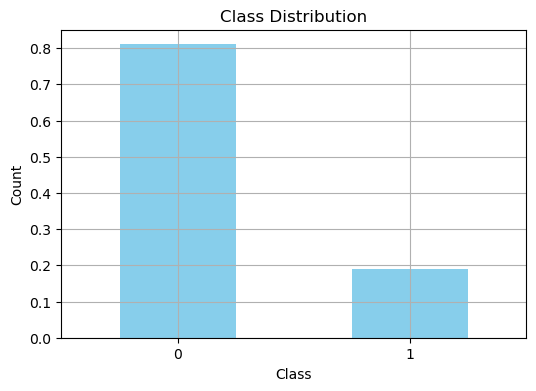

In [215]:
# Plotting class distribution
plt.figure(figsize=(6, 4))
class_distribution.plot(kind='bar', color='skyblue')
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.grid(True)
plt.show()

This dataset apparently describes more chemically low-quality wines (81.04%) than high-quality wines (18.95%). The counts per class suggest that the data is not balanced. The next step will be to balance the classes.

### Part 1 - Exploratory Data Analysis<a class="anchor" id="part-1"></a>
___

#### 1. Distribution of the dataset

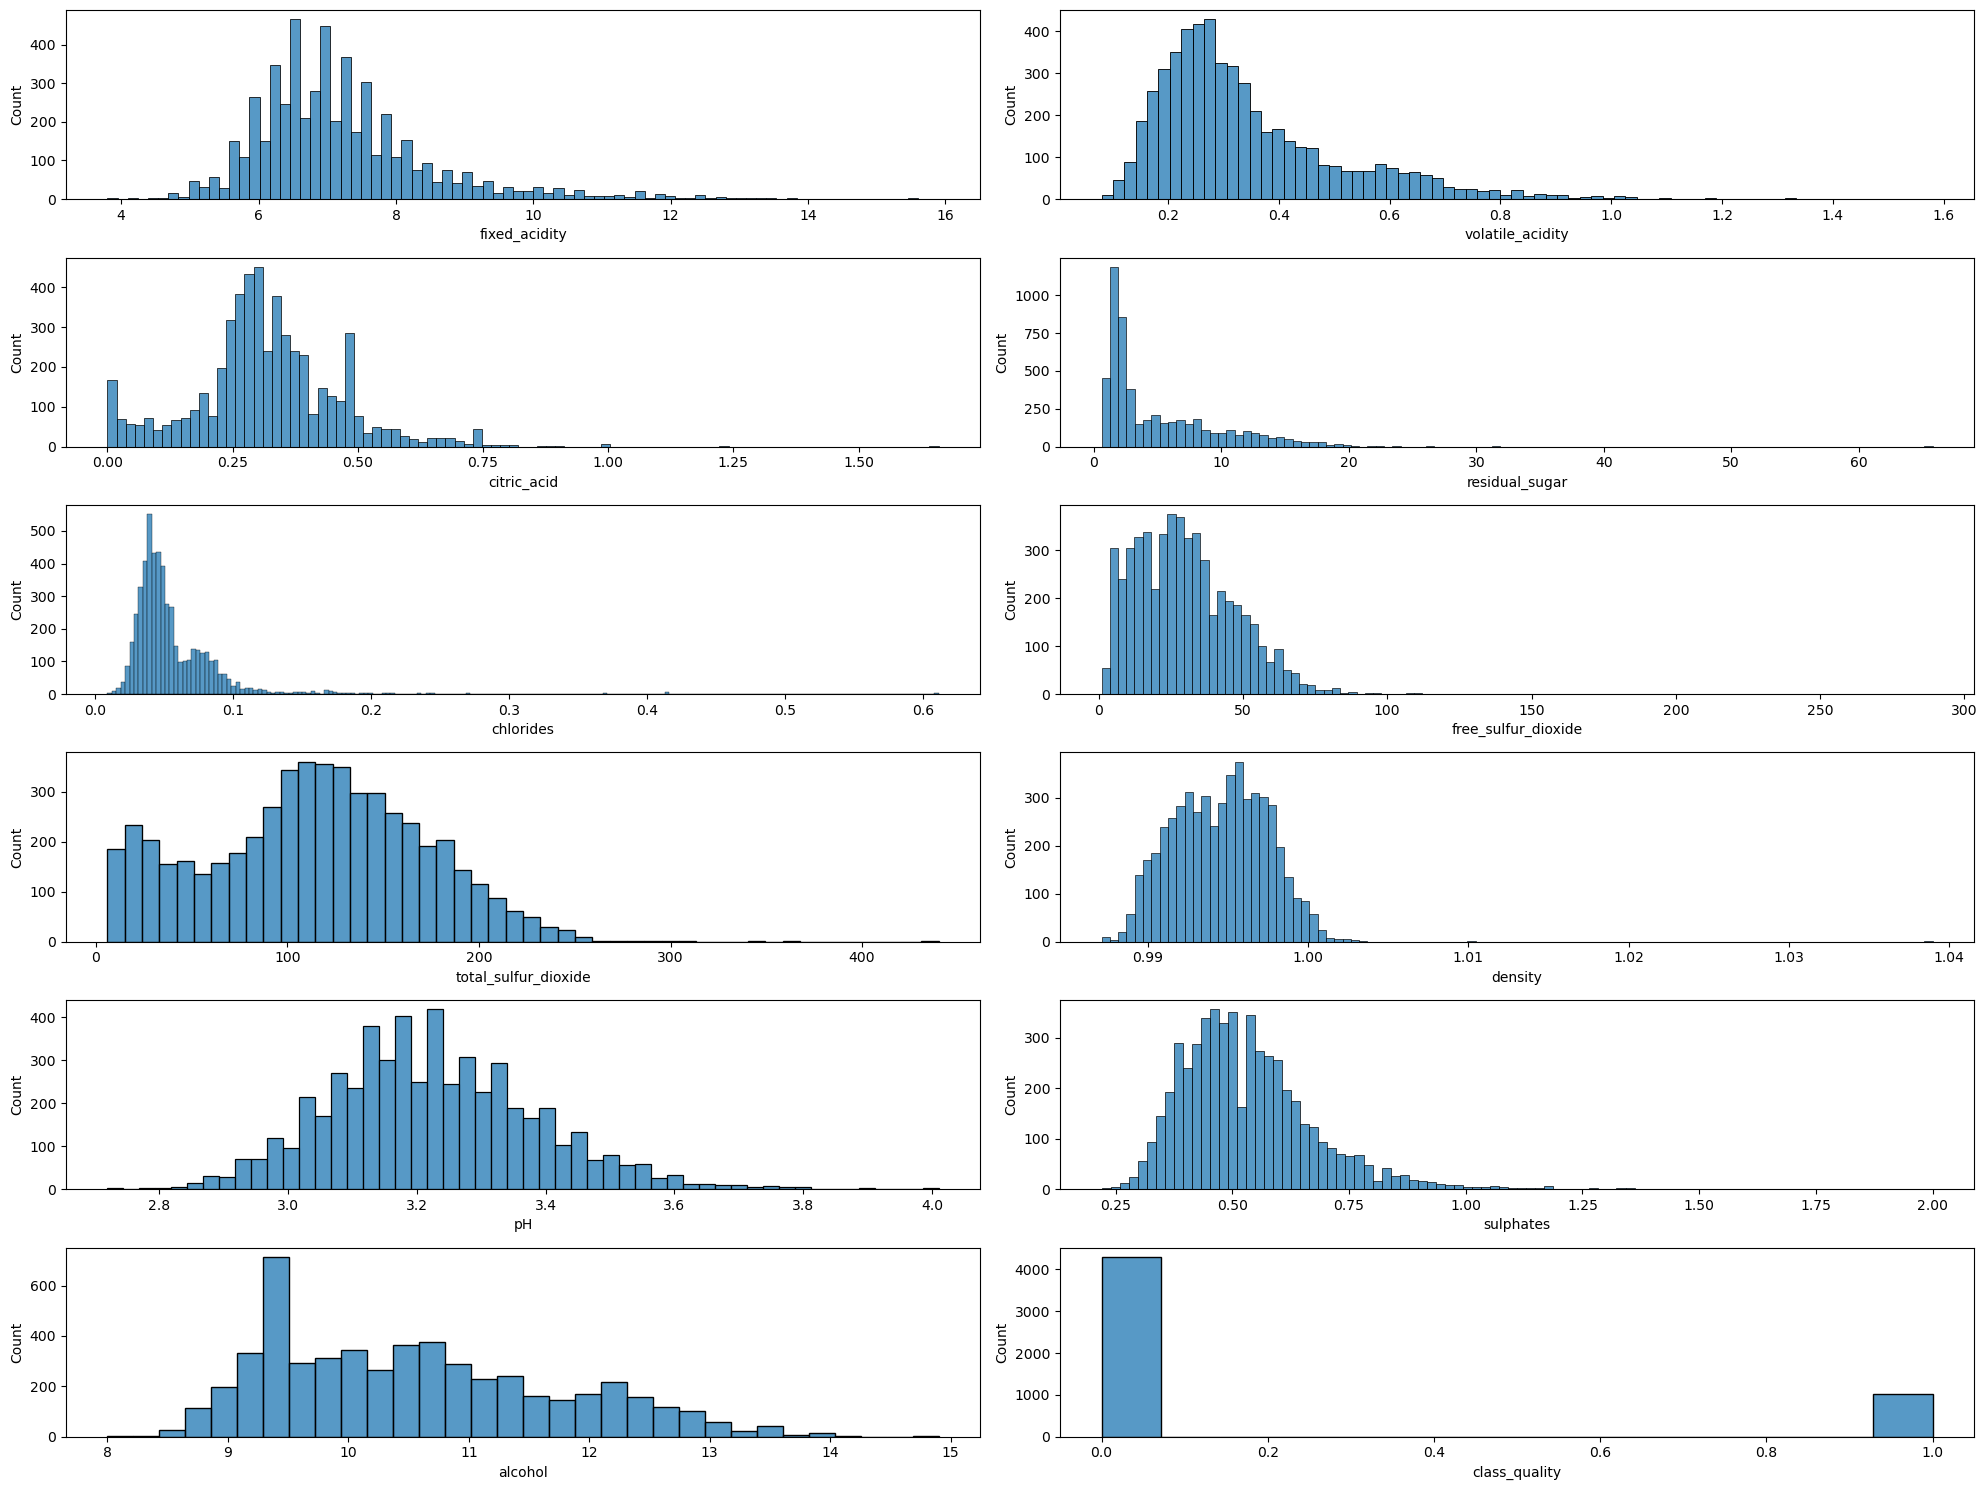

In [216]:
# Visualize distribution of unscaled data in each feature
col_names = wine_class.columns
plot_num = 1

plt.subplots(6,2, figsize=(20,15))

for col in wine_class:
    plt.subplot(6,2,plot_num)
    sns.histplot(wine_class[col])
    plot_num +=1

plt.tight_layout()
plt.show()

Observations:
- The data contained in each feature display normalized data.<br>
- The one binary column is our target (class_quality).<br>
- The target is either 1 (high quality) or 0 (low quality), so this will be a binary classification problem.
The data will be scaled, and different scalers will be implemented to observe their effects on each model.

#### 2. Histogram

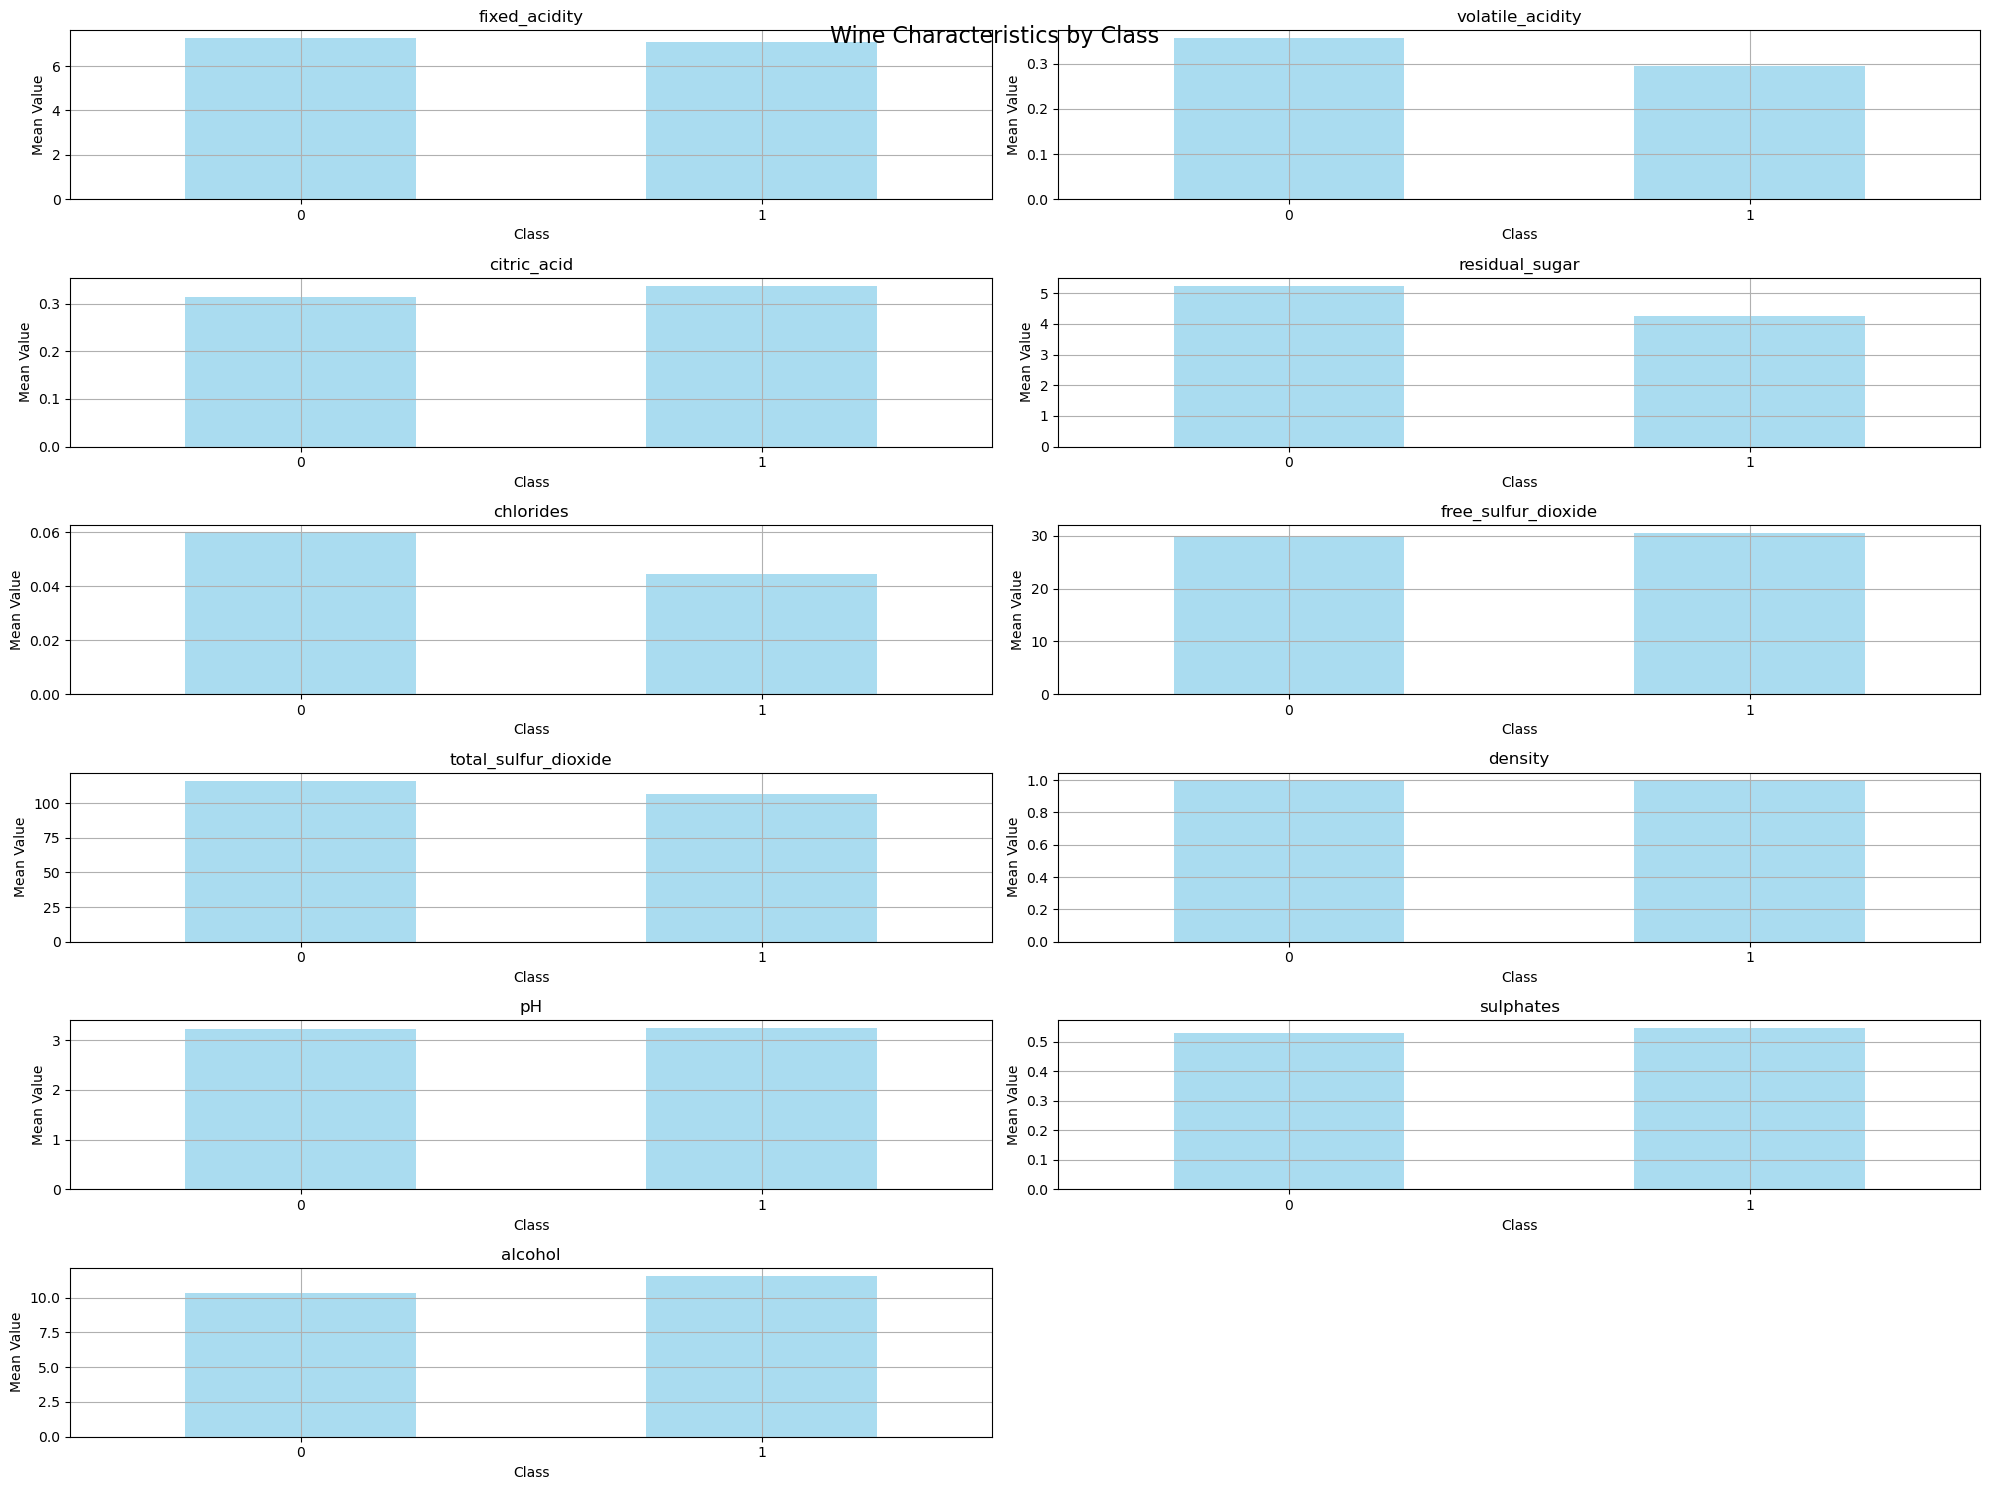

In [217]:
# Define the columns to plot (exclude 'class')
columns_to_plot = list(wine_class.columns)
columns_to_plot.remove('class_quality')

# Plotting
plt.figure(figsize=(20,15))

# Loop through each column and create a grouped bar plot
for i, col in enumerate(columns_to_plot):
    plt.subplot(6, 2, i+1)  # Adjust the subplot layout as needed
    wine_class.groupby('class_quality')[col].mean().plot(kind='bar', color='skyblue', alpha=0.7)
    plt.title(col)
    plt.grid(True)
    plt.xlabel('Class')
    plt.ylabel('Mean Value')
    plt.xticks(rotation=0)
    plt.tight_layout()

plt.suptitle('Wine Characteristics by Class', fontsize=16)
plt.show()

Differences in each feature between high or low quality wine classification are mild. The largest differences in wine characteristcs were in 'volatile_acidity', 'residual_sugar', 'chlorides', and 'alcohol'.

#### 3. Crorrelation between variables

Let's establish potential correlations between variables.

#### Heatmap

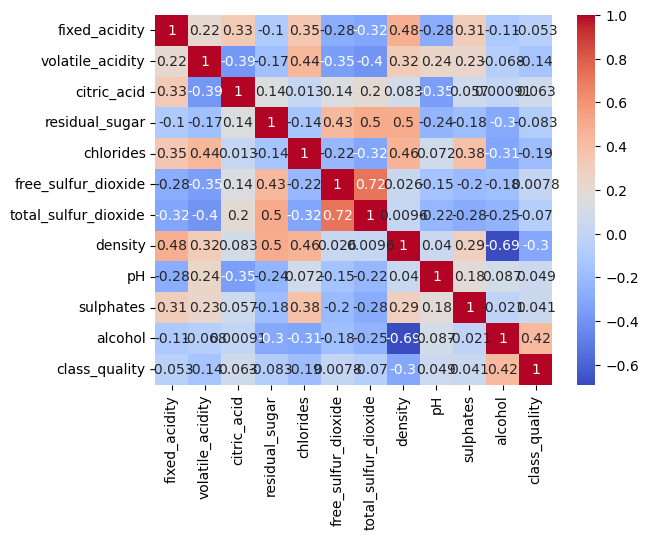

In [218]:
# Creating correlation matrix
cropcorre = wine_class.copy()

# Assuming cropcorre is your DataFrame
#categorical_columns = cropcorre.select_dtypes(include=['object']).columns.tolist()
numeric_columns = cropcorre.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Create an instance of LabelEncoder
label_encoder = LabelEncoder()

# Apply LabelEncoder to each categorical column
for column in numeric_columns:
    cropcorre[column] = label_encoder.fit_transform(cropcorre[column])

# Plot the heatmap
sns.heatmap(cropcorre.corr(), annot=True, cmap='coolwarm')

# Show the plot
plt.show()

There are a high correlation between:
. alcohol and density (0.69),<br>
. free_sulfur_dioxide and total_sulfur_dioxide (0.72): expected since the presence of one of the means the absence of the other one,<br>
. residual_sugar and density (0.5),<br>
. fixed_acidity and density (0.48)

Most of the components analyzed will contribute to the overall density of the wine. So that correlation between variables and density will be high.

### Part 2 - Pre-processing Data<a class="anchor" id="part-2"></a>

___

#### 1. Importing Packages

In [219]:
# hide warnings - we will be using default parameter values
import warnings
warnings.filterwarnings('ignore')

In [220]:
# Splitting data
from sklearn.model_selection import train_test_split, GridSearchCV

# Scalers
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler 

# Classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

import time

#### 2. Defining target and independent variables

In [221]:
wine_class.columns

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'class_quality'],
      dtype='object')

In [222]:
# Independent variable
X = wine_class.drop(['class_quality'], axis=1)

# Dependent variable
y = wine_class['class_quality']

# Checking
display(X)
print(y)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8


0       0
1       0
2       0
3       0
5       0
       ..
6492    0
6493    0
6494    0
6495    1
6496    0
Name: class_quality, Length: 5318, dtype: int32


In [223]:
# Check the shapes
print("Subset dimensions:")
print (f'The shape of the dependent variable (y): {y.shape}')
print (f'The shape of the independent variables (X): {X.shape}')

Subset dimensions:
The shape of the dependent variable (y): (5318,)
The shape of the independent variables (X): (5318, 11)


In [224]:
# inspecting range of values for each
stats = wine_class.describe()
stats.loc[['min','max']]

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,class_quality
min,3.8,0.08,0.00,0.6,0.009,1.0,6.0,0.98711,2.72,0.22,8.0,0.0
max,15.9,1.58,1.66,65.8,0.611,289.0,440.0,1.03898,4.01,2.00,14.9,1.0


The values in each variable clearly exist on different ranges.

#### 3. Splitting Data

In [225]:
# Splitting our data
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.25,
                                                    random_state=42,
                                                    stratify=y)

# Check 
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(3988, 11) (1330, 11) (3988,) (1330,)


#### 4. Scalling Data

#### MinMaxScaler():
Keeps distribution, and scales your data to a range of [0,1]. It can perform better than the Standard Scaler when your features have non-normal distributions. It does not create distorting of the actual distribution, instead reduces the range to be between 0 and 1.

In [226]:
# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit the scaler to the train data. Computes the min and max for each feature
scaler = scaler.fit(X_train) # do not scale target variable

# Fit the scaler and transform both data subsets
X_train_mm=scaler.transform(X_train)
X_test_mm=scaler.transform(X_test)

X_train_mm_df=pd.DataFrame(X_train_mm)

#### Standard Scaler(): 

It works better with normal distributions, such as Linear/Logistic regression. The standard scaler does distort relative distances slightly, which is probably the best choice based on the data observation from the histograms.

In [227]:
# Initialize the Standard Scaler
scaler=StandardScaler()

# Fit the scaler to the train data. Computes the min and max for each feature
scaler=scaler.fit(X_train)

# Fit the scaler and transform both data subsets
X_train_ss=scaler.transform(X_train)
X_test_ss=scaler.transform(X_test)


X_train_ss_df=pd.DataFrame(X_train_ss)

#### Robust Scaler():
It is much more resilient to the presence of a large number of outliers in the original distribution. There were no noticeable outliers observed when plotting the features.

In [228]:
# Initialize the MinMaxScaler
scaler=RobustScaler()

# Fit the scaler to the train data. Computes the min and max for each feature
scaler=scaler.fit(X_train)

# Fit the scaler and transform both data subsets
X_train_rob=scaler.transform(X_train)
X_test_rob=scaler.transform(X_test)

X_train_rob_df=pd.DataFrame(X_train_rob)

### Part 3 - Training Models<a class="anchor" id="part-3"></a>

___

#### 1. Logistic Regression<a class="anchor" id="part-3.1"></a>

#### Fitting Logistic Regression model to MinMaxScaler() scaled data

- Checking running time and **C** Values

In [229]:
start = time.time()

# The C_values to try
C_values = [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]

# Empty lists to append train and test accuracy scores to
train_acc_mm = []
test_acc_mm = []

# Loop through the different C values
for C in C_values:

    # Instantiate the model, increase max_iter to 1000
    logit = LogisticRegression(C = C, max_iter = 1000, random_state = 42)

    # Fit the model
    logit.fit(X_train_mm, y_train)

    # Score the model
    train_acc_mm.append(logit.score(X_train_mm,y_train))
    test_acc_mm.append(logit.score(X_test_mm, y_test))

stop = time.time()
runtime_logit_mm = stop-start
print(f"Runtime: {round(runtime_logit_mm,2)} seconds")

Runtime: 0.15 seconds


A very fast process.

- Accuracy scores for the different **C** values:

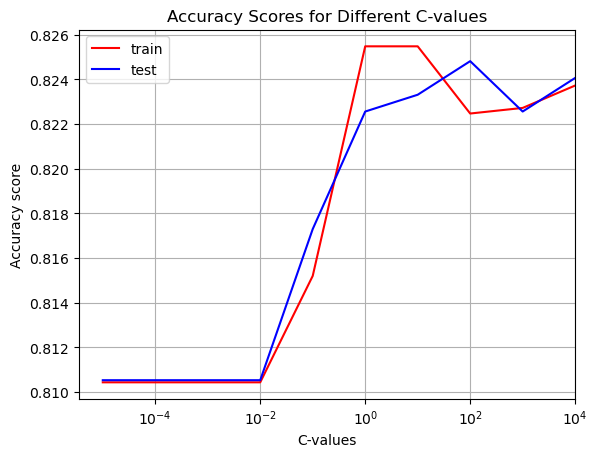

In [230]:
# visualize accuracies for different C-values
C_values = [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]

plt.figure()
plt.plot(C_values, train_acc_mm, c='red', label='train')
plt.plot(C_values, test_acc_mm, c='blue', label='test')
plt.xscale('log')

# Labels
plt.title('Accuracy Scores for Different C-values')
plt.xlabel('C-values')
plt.ylabel('Accuracy score')
plt.legend()
plt.grid(True)
#plt.xlim(0, max(neighbors))  # Adjust the x-axis limits
plt.xlim(0, max(C_values))
plt.show()

Between 0.1 (10<sup>-1</sup>) and 1 (10<sup>0</sup>) the model overfit.

At C-values = 100 (10<sup>2</sup>) test accuracy is higher (0.826) compared to the training set (0.823), this could indicate that the model is generalizing well and not overfitting to the training data. A lower accuracy on the training set suggests that the model might not be fitting the training data as closely.

However,the best **C**-value to considere based on the graphic above would be 100 (10<sup>3</sup>) because the plot level at this point, and the train and test accuracy scores are closest.

- Accuracy Tests

In [231]:
# Getting our best Logistic Regression
# Instantiate the model
logit_mm = LogisticRegression(C = 100, max_iter = 1000, random_state = 42)

# Fit the model
logit_mm.fit(X_train_mm, y_train)

# Store accuracy scores
logit_mm_train = logit_mm.score(X_train_mm, y_train)
logit_mm_test = logit_mm.score(X_test_mm, y_test)

# Score the model
print(f"Train Accuracy: {logit_mm_train}")
print(f"Test Accuracy: {logit_mm_test}")

Train Accuracy: 0.8224674022066198
Test Accuracy: 0.824812030075188


Based on the score analysis this model is performing well despite the high train accuracy because there is a very small gap between the training and the test accuracies. This suggest a low risk of overfitting.

A value of 0.822 in training accuracy means that the model learned the training data effectively. While a higher test accuracy of 0.824 means that the model predicted well all instances in the test dataset.

In general this model performed really well at generalizing to new and unseen data, and on each of the 5 folders.

In [232]:
scores_df=pd.DataFrame(columns=['model','scaler','train','test', 'runtime', 'C-values', 'K-values', 'n_estimators', 'max_depth'])

scores_df.loc[scores_df.shape[0],:]=['Logistic','MinMaxScaler',logit_mm_train,logit_mm_test, round(runtime_logit_mm,2), '100', '-----', '-----', '-----']
scores_df

,model,scaler,train,test,runtime,C-values,K-values,n_estimators,max_depth
0,Logistic,MinMaxScaler,0.822467,0.824812,0.15,100,-----,-----,-----


#### Fitting Logistic Regression model to StandarScaler() scaled data

- Checking running time

In [233]:
start = time.time()

# Empty lists to append the training and test accuracy scores to
train_acc_ss = []
test_acc_ss = []

# Loop through the same C values
for C in C_values:

    # Instantiate the model
    logit=LogisticRegression(C=C, max_iter=1000, random_state=42)

    # Fit the model
    logit.fit(X_train_ss, y_train)

    # Score the model
    train_acc_ss.append(logit.score(X_train_ss, y_train))
    test_acc_ss.append(logit.score(X_test_ss, y_test))

stop = time.time()
runtime_logit_ss = stop-start
print(f"Runtime: {round(runtime_logit_ss,2)} seconds")

Runtime: 0.1 seconds


- Accuracy scores for the different **C** values:

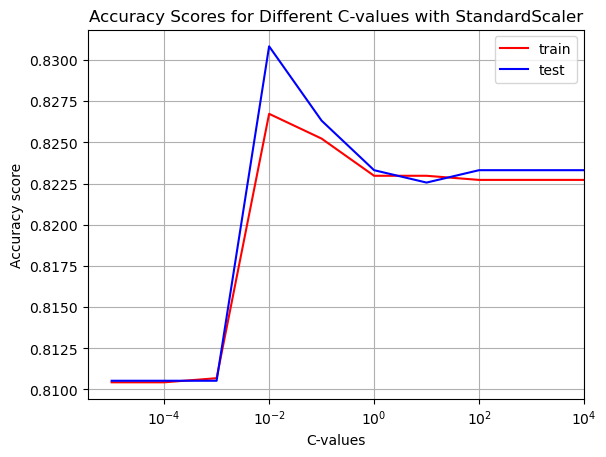

In [234]:
# visualize accuracies for different C-values
C_values = [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]


# visualize accuracies for different C-values
plt.figure()
plt.plot(C_values, train_acc_ss, c='red', label='train')
plt.plot(C_values, test_acc_ss, c='blue', label='test')
plt.xscale('log')

# Labels
plt.title('Accuracy Scores for Different C-values with StandardScaler')
plt.xlabel('C-values')
plt.ylabel('Accuracy score')
plt.legend()
plt.grid(True)
plt.xlim(0, max(C_values))
plt.show()

The best value for **C** based on the graphic above is 1 (10<sup>0</sup>) because the plot level at this point, the train and test accuracy scores are closest, and the test accuracy performed the best over train accuracy.


- Accuracy Tests

In [235]:
# Getting our best Logistic Regression
# Instantiate the model
logit_ss = LogisticRegression(C = 1, max_iter = 1000, random_state = 42)

# Fit the model
logit_ss.fit(X_train_ss, y_train)

# Store accuracy scores
logit_ss_train = logit_ss.score(X_train_ss, y_train)
logit_ss_test = logit_ss.score(X_test_ss, y_test)

# Score the model
print(f"Train Accuracy: {logit_ss_train}")
print(f"Test Accuracy: {logit_ss_test}")

Train Accuracy: 0.8229689067201604
Test Accuracy: 0.8233082706766918


Fitting the Logistic Regression on scaled data using StandardScaler() had a slightly better scores than using the MinMaxScaler(). The model achieved high accuracy both on the training data (82.29%) and the test accuracy (82.33%). This suggest that the model effectively learned from the training data to generalize on the new unseen data (test data).

In [236]:
scores_df.loc[scores_df.shape[0],:]=['Logistic','Standard',logit_ss_train,logit_ss_test, round(runtime_logit_ss,2), '1','-----', '-----', '-----']
scores_df

,model,scaler,train,test,runtime,C-values,K-values,n_estimators,max_depth
0,Logistic,MinMaxScaler,0.822467,0.824812,0.15,100,-----,-----,-----
1,Logistic,Standard,0.822969,0.823308,0.1,1,-----,-----,-----


This Model performed slightly better using MinMaxScaler().


#### Fitting Logistic Regression model to RobustScaler() scaled data

- Checking for running time

In [237]:
start = time.time()

# Empty lists to append the training and test accuracy scores to
train_acc_rob = []
test_acc_rob = []

# Loop through the same C values
for C in C_values:

    # Instantiate the model
    logit=LogisticRegression(C=C, max_iter=1000, random_state=42)

    # Fit the model
    logit.fit(X_train_rob, y_train)

    # Score the model
    train_acc_rob.append(logit.score(X_train_rob, y_train))
    test_acc_rob.append(logit.score(X_test_rob, y_test))

stop = time.time()
runtime_logit_rob = stop-start
print(f"Runtime: {round(runtime_logit_rob,2)} seconds")

Runtime: 0.11 seconds


- Accuracy scores for the different **C** values:
    

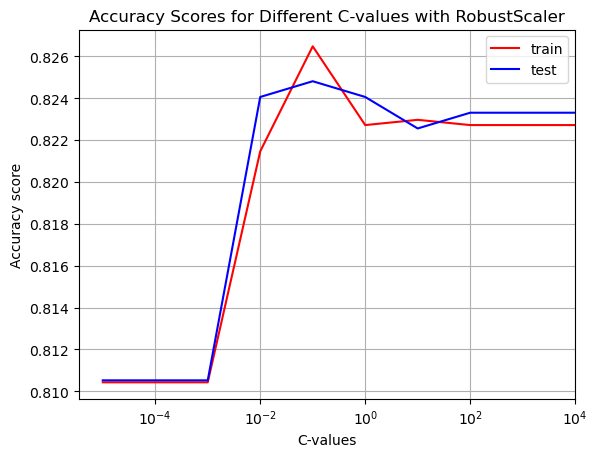

In [238]:
# visualize accuracies for different C-values
C_values = [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]

# visualize accuracies for different C-values
plt.figure()
plt.plot(C_values, train_acc_rob, c='red', label='train')
plt.plot(C_values, test_acc_rob, c='blue', label='test')
plt.xscale('log')

# Labels
plt.title('Accuracy Scores for Different C-values with RobustScaler')
plt.xlabel('C-values')
plt.ylabel('Accuracy score')
plt.legend()
plt.grid(True)
plt.xlim(0, max(C_values))
plt.show()

The best value for **C** based on the graphic above is 1 (10<sup>1</sup>) because the plot level at this point.

- Accuracy Tests

In [239]:
# Getting our best Logistic Regression
# Instantiate the model
logit_rob = LogisticRegression(C = 10, max_iter = 1000, random_state = 42)

# Fit the model
logit_rob.fit(X_train_rob, y_train)

# Store accuracy scores
logit_rob_train = logit_rob.score(X_train_rob, y_train)
logit_rob_test = logit_rob.score(X_test_rob, y_test)

# Score the model
print(f"Train Accuracy: {logit_rob_train}")
print(f"Test Accuracy: {logit_rob_test}")

Train Accuracy: 0.8229689067201604
Test Accuracy: 0.8225563909774436


In [240]:
scores_df.loc[scores_df.shape[0],:]=['Logistic','Robust',logit_rob_train,logit_rob_test, round(runtime_logit_rob,2), '1','-----', '-----', '-----']
scores_df

,model,scaler,train,test,runtime,C-values,K-values,n_estimators,max_depth
0,Logistic,MinMaxScaler,0.822467,0.824812,0.15,100,-----,-----,-----
1,Logistic,Standard,0.822969,0.823308,0.1,1,-----,-----,-----
2,Logistic,Robust,0.822969,0.822556,0.11,1,-----,-----,-----


In [241]:
scores_df.loc[scores_df.shape[0],:]=['-----']
scores_df

,model,scaler,train,test,runtime,C-values,K-values,n_estimators,max_depth
0,Logistic,MinMaxScaler,0.822467,0.824812,0.15,100,-----,-----,-----
1,Logistic,Standard,0.822969,0.823308,0.1,1,-----,-----,-----
2,Logistic,Robust,0.822969,0.822556,0.11,1,-----,-----,-----
3,-----,-----,-----,-----,-----,-----,-----,-----,-----


Using RobustScaler() generated similar accuracy in train and test, and lower run time. Outliers  weren't avaluated on this dataset. Presumuable this dataset does not contain many outliers that can misslead the prediction using this model.

In conclusion, MinMaxScaler and RobustScaler had similar results, generalizing  effectively to unseen data as StandardScaler.

Based on these observations, the choice is very tigh, and it will decide in this case based on computational efficiency. RobustScaler had a run time of 0.18 second,slightly faster than with the other two scalers. Other metrics have to be applied.

#### Pipeline and Cross Validation for Logistic Regression

In [242]:
# Define the pipeline 
pipelines = [
    ('MinMax + Logistic Regression', Pipeline([
        ('scaler', MinMaxScaler()),
        ('classifier', LogisticRegression())
    ])),
    ('Standard + Logistic Regression', Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', LogisticRegression())
    ])),
    ('Robust + Logistic Regression', Pipeline([
        ('scaler', RobustScaler()),
        ('classifier', LogisticRegression())
    ]))
]

# Define parameter grids for grid search
param_grids = {
    'MinMax + Logistic Regression': {
        'scaler__feature_range': [(0, 1)],
        'classifier__C': [1.0, 10.0,100]  
    },
    'Standard + Logistic Regression': {
        'scaler__with_mean': [True, False],  
        'scaler__with_std': [True, False],   
        'classifier__C': [0.1, 1.0, 10.0]    
    },
    'Robust + Logistic Regression': {
        'scaler__quantile_range': [(25.0, 75.0)],  
        'classifier__C': [0.1, 1.0, 10.0]           
    }
}

# Perform grid search for each pipeline
for name, pipeline in pipelines:
    param_grid = param_grids[name]
    grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)
    
    # Train final model with best parameters and evaluate
    best_pipeline = grid_search.best_estimator_
    y_pred = best_pipeline.predict(X_test)
    
    print(f"Pipeline: {name}")
    print(f"Best Parameters: {grid_search.best_params_}")
    print(classification_report(y_test, y_pred))
    print("---------------------------------------------")


Pipeline: MinMax + Logistic Regression
Best Parameters: {'classifier__C': 1.0, 'scaler__feature_range': (0, 1)}
              precision    recall  f1-score   support

           0       0.85      0.95      0.90      1078
           1       0.57      0.26      0.36       252

    accuracy                           0.82      1330
   macro avg       0.71      0.61      0.63      1330
weighted avg       0.79      0.82      0.79      1330

---------------------------------------------
Pipeline: Standard + Logistic Regression
Best Parameters: {'classifier__C': 0.1, 'scaler__with_mean': True, 'scaler__with_std': True}
              precision    recall  f1-score   support

           0       0.86      0.95      0.90      1078
           1       0.58      0.32      0.41       252

    accuracy                           0.83      1330
   macro avg       0.72      0.63      0.65      1330
weighted avg       0.80      0.83      0.81      1330

---------------------------------------------
Pipeline

Using RobustScaler() resulted in similar accuracy scores for both the train and test sets, with a lower runtime. Outliers were not evaluated in this dataset, suggesting that it may not contain many outliers that could mislead the predictions using this model.

In conclusion, MinMaxScaler and RobustScaler showed similar results, effectively generalizing to unseen data like StandardScaler.

Based on all previous observations, StandardScaler() in logistic regression is the best model for this dataset compared to the same model using different scalers. It had an accuracy of 83%. However, the F1 score for Class 0 (low quality) was 0.9, indicating that the classifier performs well in correctly identifying instances of this class. In contrast, the F1 score for Class 1 (high quality) was 0.41, a low value, which suggests that the classifier struggled to correctly identify a significant portion of actual Class 1 instances.

In conclusion, the imbalance in F1-scores between the two classes highlights potential issues related to class imbalance, where the classifier may struggle to generalize effectively for the minority class. Data needs to be balanced before training.

#### Balancing Data

In this case, Synthetic Minority Over-sampling Technique (SMOTE) would have been ideal to use since it is the most popular method for balancing imbalanced datasets, particularly in classification tasks where one class is significantly underrepresented compared to the others. This method was selected because:

- It generates synthetic samples for the minority class by interpolating between existing minority class instances.
- It reduces the risk of overfitting that might occur when generating synthetic samples for the minority class because it adds variability with the added data, making the classifier less likely to memorize the training data.
- It is compatible with the machine learning algorithms that are going to be used (logistic regression, k-nearest neighbors (KNN), and random forests).

However, it was not possible to import SMOTE from imbalanced-learn in scikit-learn. Hence, Downsampling will be the first option instead of Upsampling, to avoid duplicating existing samples in the minority class when using Upsampling.

- Downsampling

In [243]:
# Importing libraries
from sklearn.utils import resample

# Upsample
print('Number of class 0 examples before:', X_train[y_train == 0].shape[0])

X_downsampled, y_downsampled = resample(X_train[y_train == 0], 
                                        y_train[y_train == 0], 
                                        replace=True, 
                                        n_samples=X_train[y_train == 1].shape[0], 
                                        random_state=123)

print('Number of class 0 examples after:', X_downsampled.shape[0])

# Combine upsample with original data
X_train_down = np.vstack((X_train[y_train == 1], X_downsampled))
y_train_down = np.hstack((y_train[y_train == 1], y_downsampled))

Number of class 0 examples before: 3232
Number of class 0 examples after: 756


- Upsampling

In [244]:
# Upsample
print('Number of class 1 examples before:', X_train[y_train == 1].shape[0])

X_upsampled, y_upsampled = resample(X_train[y_train == 1], 
                                    y_train[y_train == 1], 
                                    replace=True, 
                                    n_samples=X_train[y_train == 0].shape[0], 
                                    random_state=123)

print('Number of class 1 examples after:', X_upsampled.shape[0])

# Combine upsample with original data
X_train_up = np.vstack((X_train[y_train == 0], X_upsampled))
y_train_up = np.hstack((y_train[y_train == 0], y_upsampled))

Number of class 1 examples before: 756
Number of class 1 examples after: 3232


- SMOTE (Synthetic Minority Over-sampling Technique)

Class distribution before SMOTE:
{0: 3232, 1: 756}

Class distribution after SMOTE:
{0: 3232, 1: 3232}


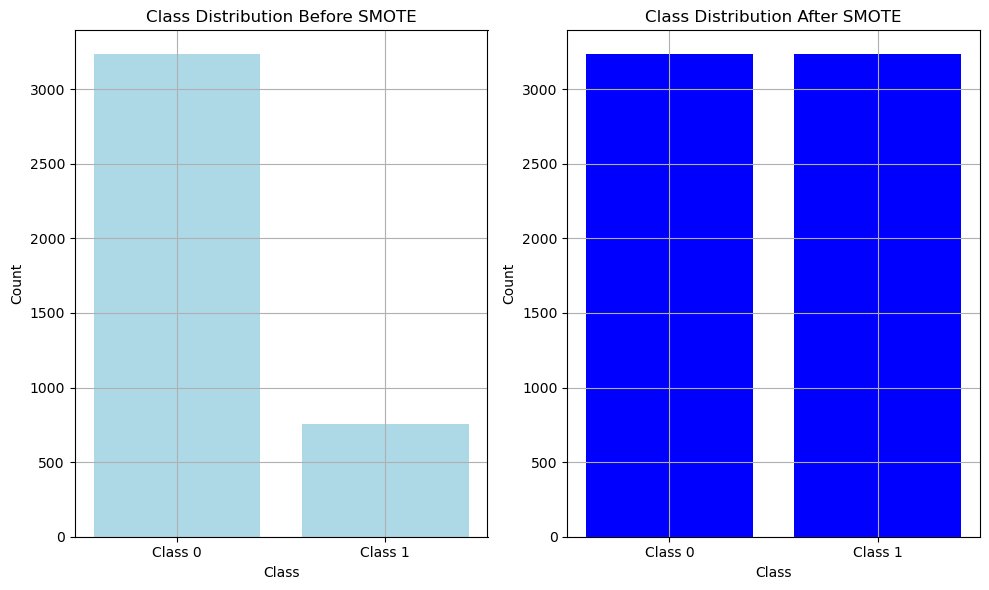

In [245]:
from imblearn.over_sampling import SMOTE

# Check class distribution before SMOTE
unique, counts = np.unique(y_train, return_counts=True)
print("Class distribution before SMOTE:")
print(dict(zip(unique, counts)))

# Apply SMOTE to balance the training data
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Check class distribution after SMOTE
unique_balanced, counts_balanced = np.unique(y_train_smote, return_counts=True)
print("\nClass distribution after SMOTE:")
print(dict(zip(unique_balanced, counts_balanced)))

# Plot class distribution before and after SMOTE
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.bar(['Class 0', 'Class 1'], counts, color=['lightblue', 'lightblue'])
plt.title('Class Distribution Before SMOTE')
plt.grid(True)
plt.xlabel('Class')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
plt.bar(['Class 0', 'Class 1'], counts_balanced, color=['blue', 'blue'])
plt.title('Class Distribution After SMOTE')
plt.grid(True)
plt.xlabel('Class')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

#### Pipeline and Cross Validation with Balanced data

- Downsampling

In [246]:
# Define the pipeline with a list of (name, transformer) tuples
pipelines = [
    ('MinMax + Logistic Regression', Pipeline([
        ('scaler', MinMaxScaler()),
        ('classifier', LogisticRegression())
    ])),
    ('Standard + Logistic Regression', Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', LogisticRegression())
    ])),
    ('Robust + Logistic Regression', Pipeline([
        ('scaler', RobustScaler()),
        ('classifier', LogisticRegression())
    ]))
]

# Define parameter grids for grid search
param_grids = {
    'MinMax + Logistic Regression': {
        'scaler__feature_range': [(0, 1)],  # MinMaxScaler feature range
        'classifier__C': [1.0, 10.0,100]  # LogisticRegression regularization parameter (C)
    },
    'Standard + Logistic Regression': {
        'scaler__with_mean': [True, False],  # StandardScaler centering
        'scaler__with_std': [True, False],   # StandardScaler scaling
        'classifier__C': [0.1, 1.0, 10.0]    # LogisticRegression regularization parameter (C)
    },
    'Robust + Logistic Regression': {
        'scaler__quantile_range': [(25.0, 75.0)],  # RobustScaler quantile range
        'classifier__C': [0.1, 1.0, 10.0]           # LogisticRegression regularization parameter (C)
    }
}

# Perform grid search for each pipeline
for name, pipeline in pipelines:
    param_grid = param_grids[name]
    grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')
    grid_search.fit(X_train_down, y_train_down)
    
    # Train final model with best parameters and evaluate
    best_pipeline = grid_search.best_estimator_
    y_pred_down = best_pipeline.predict(X_test)
    
    print(f"Pipeline: {name}")
    print(f"Best Parameters: {grid_search.best_params_}")
    print(classification_report(y_test, y_pred_down))
    print("---------------------------------------------")

Pipeline: MinMax + Logistic Regression
Best Parameters: {'classifier__C': 10.0, 'scaler__feature_range': (0, 1)}
              precision    recall  f1-score   support

           0       0.94      0.69      0.80      1078
           1       0.38      0.81      0.52       252

    accuracy                           0.72      1330
   macro avg       0.66      0.75      0.66      1330
weighted avg       0.84      0.72      0.75      1330

---------------------------------------------
Pipeline: Standard + Logistic Regression
Best Parameters: {'classifier__C': 0.1, 'scaler__with_mean': False, 'scaler__with_std': True}
              precision    recall  f1-score   support

           0       0.94      0.69      0.80      1078
           1       0.38      0.82      0.52       252

    accuracy                           0.71      1330
   macro avg       0.66      0.76      0.66      1330
weighted avg       0.84      0.71      0.74      1330

---------------------------------------------
Pipeli

- Upsampling

In [247]:
# Define the pipeline with a list of (name, transformer) tuples
pipelines = [
    ('MinMax + Logistic Regression', Pipeline([
        ('scaler', MinMaxScaler()),
        ('classifier', LogisticRegression())
    ])),
    ('Standard + Logistic Regression', Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', LogisticRegression())
    ])),
    ('Robust + Logistic Regression', Pipeline([
        ('scaler', RobustScaler()),
        ('classifier', LogisticRegression())
    ]))
]

# Define parameter grids for grid search
param_grids = {
    'MinMax + Logistic Regression': {
        'scaler__feature_range': [(0, 1)],  # MinMaxScaler feature range
        'classifier__C': [1.0, 10.0,100]  # LogisticRegression regularization parameter (C)
    },
    'Standard + Logistic Regression': {
        'scaler__with_mean': [True, False],  # StandardScaler centering
        'scaler__with_std': [True, False],   # StandardScaler scaling
        'classifier__C': [0.1, 1.0, 10.0]    # LogisticRegression regularization parameter (C)
    },
    'Robust + Logistic Regression': {
        'scaler__quantile_range': [(25.0, 75.0)],  # RobustScaler quantile range
        'classifier__C': [0.1, 1.0, 10.0]           # LogisticRegression regularization parameter (C)
    }
}

# Perform grid search for each pipeline
for name, pipeline in pipelines:
    param_grid = param_grids[name]
    grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')
    grid_search.fit(X_train_up, y_train_up)
    
    # Train final model with best parameters and evaluate
    best_pipeline = grid_search.best_estimator_
    y_pred_up = best_pipeline.predict(X_test)
    
    print(f"Pipeline: {name}")
    print(f"Best Parameters: {grid_search.best_params_}")
    print(classification_report(y_test, y_pred_up))
    print("---------------------------------------------")

Pipeline: MinMax + Logistic Regression
Best Parameters: {'classifier__C': 10.0, 'scaler__feature_range': (0, 1)}
              precision    recall  f1-score   support

           0       0.95      0.70      0.81      1078
           1       0.39      0.83      0.53       252

    accuracy                           0.73      1330
   macro avg       0.67      0.76      0.67      1330
weighted avg       0.84      0.73      0.76      1330

---------------------------------------------
Pipeline: Standard + Logistic Regression
Best Parameters: {'classifier__C': 10.0, 'scaler__with_mean': False, 'scaler__with_std': True}
              precision    recall  f1-score   support

           0       0.94      0.70      0.80      1078
           1       0.39      0.82      0.53       252

    accuracy                           0.72      1330
   macro avg       0.67      0.76      0.66      1330
weighted avg       0.84      0.72      0.75      1330

---------------------------------------------
Pipel

- SMOTE

In [248]:
# Define the pipeline with a list of (name, transformer) tuples
pipelines = [
    ('MinMax + Logistic Regression + SMOTE', Pipeline([
        ('scaler', MinMaxScaler()),
        ('classifier', LogisticRegression())
    ])),
    ('Standard + Logistic Regression + SMOTE', Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', LogisticRegression())
    ])),
    ('Robust + Logistic Regression + SMOTE', Pipeline([
        ('scaler', RobustScaler()),
        ('classifier', LogisticRegression())
    ]))
]

# Define parameter grids for grid search
param_grids = {
    'MinMax + Logistic Regression + SMOTE': {
        'scaler__feature_range': [(0, 1)],  # MinMaxScaler feature range
        'classifier__C': [1.0, 10.0,100]  # LogisticRegression regularization parameter (C)
    },
    'Standard + Logistic Regression + SMOTE': {
        'scaler__with_mean': [True, False],  # StandardScaler centering
        'scaler__with_std': [True, False],   # StandardScaler scaling
        'classifier__C': [0.1, 1.0, 10.0]    # LogisticRegression regularization parameter (C)
    },
    'Robust + Logistic Regression + SMOTE': {
        'scaler__quantile_range': [(25.0, 75.0)],  # RobustScaler quantile range
        'classifier__C': [0.1, 1.0, 10.0]           # LogisticRegression regularization parameter (C)
    }
}

# Perform grid search for each pipeline
for name, pipeline in pipelines:
    param_grid = param_grids[name]
    grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')
    grid_search.fit(X_train_smote, y_train_smote)
    
    # Train final model with best parameters and evaluate
    best_pipeline = grid_search.best_estimator_
    y_pred_down = best_pipeline.predict(X_test)
    
    print(f"Pipeline: {name}")
    print(f"Best Parameters: {grid_search.best_params_}")
    print(classification_report(y_test, y_pred_down))
    print("---------------------------------------------")

Pipeline: MinMax + Logistic Regression + SMOTE
Best Parameters: {'classifier__C': 10.0, 'scaler__feature_range': (0, 1)}
              precision    recall  f1-score   support

           0       0.95      0.71      0.81      1078
           1       0.40      0.83      0.54       252

    accuracy                           0.73      1330
   macro avg       0.67      0.77      0.67      1330
weighted avg       0.84      0.73      0.76      1330

---------------------------------------------
Pipeline: Standard + Logistic Regression + SMOTE
Best Parameters: {'classifier__C': 1.0, 'scaler__with_mean': False, 'scaler__with_std': True}
              precision    recall  f1-score   support

           0       0.94      0.70      0.81      1078
           1       0.39      0.82      0.53       252

    accuracy                           0.72      1330
   macro avg       0.67      0.76      0.67      1330
weighted avg       0.84      0.72      0.75      1330

------------------------------------

Observations:
- Upsampling got slightly better results than downsampling for accuracy and F1 score.
- When using Logistic Regression with MinMaxScaler Upsampling, the F1 score for Class 0 was 0.82, a decrease of 13 points compared to unbalanced data, while Class 1 increased by 9 points from 0.43 to 0.51.
- The F1 score for Class 0 got reduced by 10 points, while Class 1 increased by 12 points between upsampling and down sampling.
- **Logistic Regression with MinMaxScaler SMOTE and C = 10**  had the best accuracy (0.73) and F1 score for Class 0 (0.81) and Class 1 (0.54).

In conclusion, balancing the data did not improve the score metrics of this model implemented, but it could have reduced to risk of overfitting and increase the prediction of Class 1 (high quality wines).





#### 2. K Nearest Neighbor<a class="anchor" id="part-3.2"></a>

#### Fitting KNN model to unscaled data

- Checking running time

In [249]:
start = time.time()

# The different K values to try out and save to 'neighbors'
neighbors = range(1, 50)

# Empty lists to append the accuracies to
train_acc = []
test_acc = []

# Loop through neighbors
for K in neighbors:

    # Instantiate the model
    knn = KNeighborsClassifier(n_neighbors=K)

    # Fit the model
    knn.fit(X_train, y_train)

    # Score the model
    train_acc.append(knn.score(X_train, y_train))
    test_acc.append(knn.score(X_test, y_test))

stop = time.time()
runtime_knn = stop-start
print(f"Runtime: {round(runtime_knn,2)} seconds")

Runtime: 6.77 seconds


- Accuracy

In [250]:
# instantiate 'vanilla' model
k_neighbors = KNeighborsClassifier() 

# fit model on unscaled data
knn = k_neighbors.fit(X_train, y_train)
# train accuracy
knn_unsc_train_acc = knn.score(X_train, y_train)
# test accuracy
knn_unsc_test_acc = knn.score(X_test, y_test)

print("---Unscaled data---")
print(f"Training accuracy: {knn_unsc_train_acc}")
print(f"TEST accuracy: {knn_unsc_test_acc}")

---Unscaled data---
Training accuracy: 0.8465396188565697
TEST accuracy: 0.7804511278195488


In [251]:
scores_df.loc[scores_df.shape[0],:]=['KNN','Unscaled',knn_unsc_train_acc,knn_unsc_test_acc,round(runtime_knn,2),'-----', 'k', '-----', '-----']
scores_df

,model,scaler,train,test,runtime,C-values,K-values,n_estimators,max_depth
0,Logistic,MinMaxScaler,0.822467,0.824812,0.15,100,-----,-----,-----
1,Logistic,Standard,0.822969,0.823308,0.1,1,-----,-----,-----
2,Logistic,Robust,0.822969,0.822556,0.11,1,-----,-----,-----
3,-----,-----,-----,-----,-----,-----,-----,-----,-----
4,KNN,Unscaled,0.84654,0.780451,6.77,-----,k,-----,-----


#### Fitting KNN model to normalized data with MinMaxScaler()

- Checking running time and **K**-Values

In [252]:
start = time.time()

# The different K values to try out and save to 'neighbors'
neighbors = range(1, 50)

# Empty lists to append the accuracies to
train_acc_mm = []
test_acc_mm = []

# Loop through neighbors
for K in neighbors:

    # Instantiate the model
    knn = KNeighborsClassifier(n_neighbors=K)

    # Fit the model
    knn.fit(X_train_mm, y_train)

    # Score the model
    train_acc_mm.append(knn.score(X_train_mm, y_train))
    test_acc_mm.append(knn.score(X_test_mm, y_test))

stop = time.time()
runtime_knn_mm = stop-start
print(f"Runtime: {round(runtime_knn_mm,2)} seconds")

Runtime: 14.08 seconds


- Accuracy

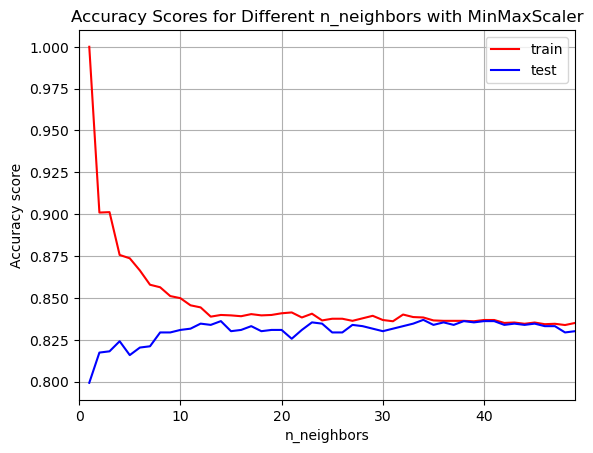

In [253]:
# Plot the accuracies
plt.figure()
plt.plot(neighbors, train_acc_mm, c='red', label='train')
plt.plot(neighbors, test_acc_mm, c='blue', label='test')
plt.title('Accuracy Scores for Different n_neighbors with MinMaxScaler')
plt.xlabel("n_neighbors")
plt.ylabel("Accuracy score")
plt.grid(True)
plt.legend()
plt.xlim(0, max(neighbors))  # Adjust the x-axis limits
plt.show()

This model shows overfitting with values of K between 0 and 12. The highest accuracy values for training and test data without overfitting were between k = 37 and k = 47.

Different k-values were tested and 42 gave the better accuracy values.

**Checking Accuracy with k = 42**

In [254]:
# KNN that performed best on scaled data
# Instantiate the model
knn_mm = KNeighborsClassifier(n_neighbors=42)

# Fit the model
knn_mm.fit(X_train_mm, y_train)

# Store accuracy scores
knn_mm_train = knn_mm.score(X_train_mm, y_train)
knn_mm_test = knn_mm.score(X_test_mm, y_test)

# Score the model
print(f"Train Accuracy: {knn_mm_train}")
print(f"Test Accuracy: {knn_mm_test}")

Train Accuracy: 0.8350050150451354
Test Accuracy: 0.8338345864661654


In [255]:
scores_df.loc[scores_df.shape[0],:]=['KNN','MinMax',knn_mm_train,knn_mm_test, round(runtime_knn_mm,2), '-----', '42', '-----', '-----']
scores_df

,model,scaler,train,test,runtime,C-values,K-values,n_estimators,max_depth
0,Logistic,MinMaxScaler,0.822467,0.824812,0.15,100,-----,-----,-----
1,Logistic,Standard,0.822969,0.823308,0.1,1,-----,-----,-----
2,Logistic,Robust,0.822969,0.822556,0.11,1,-----,-----,-----
3,-----,-----,-----,-----,-----,-----,-----,-----,-----
4,KNN,Unscaled,0.84654,0.780451,6.77,-----,k,-----,-----
5,KNN,MinMax,0.835005,0.833835,14.08,-----,42,-----,-----


#### Fitting KNN model to normalized data with StandardScaler()

- Checking running time and **n_neighbors-values**

In [256]:
start = time.time()

# Empty lists to append to
train_acc_ss = []
test_acc_ss = []

# Loop through the neighbors
for k in neighbors:

    # Instantiate the model
    knn = KNeighborsClassifier(n_neighbors=k)

    # Fit the model
    knn.fit(X_train_ss, y_train)

    # Score the model
    train_acc_ss.append(knn.score(X_train_ss, y_train))
    test_acc_ss.append(knn.score(X_test_ss, y_test))

stop = time.time()
runtime_knn_ss = stop-start
print(f"Runtime: {round(runtime_knn_ss,2)} seconds")

Runtime: 14.65 seconds


- Accuracy

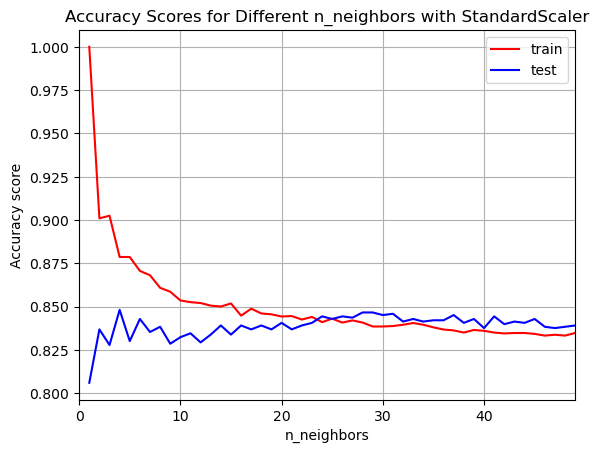

In [257]:
# Plot the accuracies
plt.figure()
plt.plot(neighbors, train_acc_ss, c='red', label='train')
plt.plot(neighbors, test_acc_ss, c='blue', label='test')
plt.title('Accuracy Scores for Different n_neighbors with StandardScaler')
plt.xlabel("n_neighbors")
plt.ylabel("Accuracy score")
plt.legend()
plt.grid(True)
plt.xlim(0, max(neighbors))  # Adjust the x-axis limits
plt.show()

The graphic above shows overfitting between k = 1 and k = 15. However, the model demonstrates effective learning to analyze unseen data after using k-values higher than 25, where both the accuracy level and test accuracy perform well."

After evaluating values between 30 and 50, the best accuracy values was n_neighbors = 30.

In [258]:
# KNN that performed best on scaled data
# Instantiate the model
knn_ss = KNeighborsClassifier(n_neighbors=30)

# Fit the model
knn_ss.fit(X_train_ss, y_train)

# Store accuracy scores
knn_ss_train = knn_ss.score(X_train_ss, y_train)
knn_ss_test = knn_ss.score(X_test_ss, y_test)

# Score the model
print(f"Train Accuracy: {knn_ss_train}")
print(f"Test Accuracy: {knn_ss_test}")

Train Accuracy: 0.8385155466399198
Test Accuracy: 0.8451127819548873


In [259]:
scores_df.loc[scores_df.shape[0],:]=['KNN','Standard',knn_ss_train,knn_ss_test, round(runtime_knn_ss,2), '-----', '30', '-----', '-----']
scores_df

,model,scaler,train,test,runtime,C-values,K-values,n_estimators,max_depth
0,Logistic,MinMaxScaler,0.822467,0.824812,0.15,100,-----,-----,-----
1,Logistic,Standard,0.822969,0.823308,0.1,1,-----,-----,-----
2,Logistic,Robust,0.822969,0.822556,0.11,1,-----,-----,-----
3,-----,-----,-----,-----,-----,-----,-----,-----,-----
4,KNN,Unscaled,0.84654,0.780451,6.77,-----,k,-----,-----
5,KNN,MinMax,0.835005,0.833835,14.08,-----,42,-----,-----
6,KNN,Standard,0.838516,0.845113,14.65,-----,30,-----,-----


#### Fitting KNN model to normalized data with Robust()

- Checking running time and **n_neighbors-values**

In [260]:
start = time.time()

# Empty lists to append to
train_acc_rob = []
test_acc_rob = []

# Loop through the neighbors
for k in neighbors:

    # Instantiate the model
    knn = KNeighborsClassifier(n_neighbors=k)

    # Fit the model
    knn.fit(X_train_rob, y_train)

    # Score the model
    train_acc_rob.append(knn.score(X_train_rob, y_train))
    test_acc_rob.append(knn.score(X_test_rob, y_test))

stop = time.time()
runtime_knn_rob = stop-start
print(f"Runtime: {round(runtime_knn_rob,2)} seconds")

Runtime: 14.42 seconds


- Accuracy

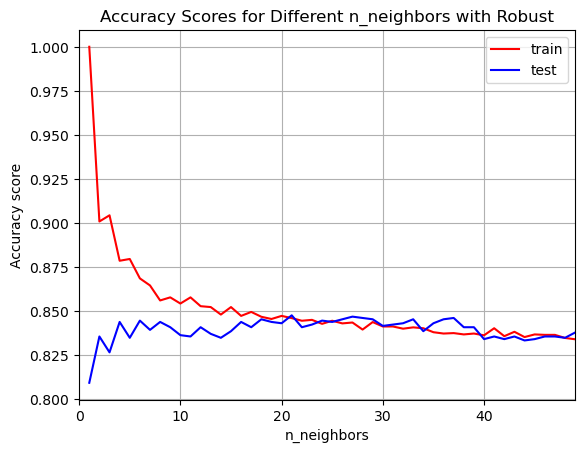

In [261]:
# Plot the accuracies
plt.figure()
plt.plot(neighbors, train_acc_rob, c='red', label='train')
plt.plot(neighbors, test_acc_rob, c='blue', label='test')
plt.title('Accuracy Scores for Different n_neighbors with Robust')
plt.xlabel("n_neighbors")
plt.ylabel("Accuracy score")
plt.legend()
plt.grid(True)
plt.xlim(0, max(neighbors))  # Adjust the x-axis limits
plt.show()

Overfitting between 1 and 17 values. Best accuracy values without overfitting was with 27 and 37 n_neighbors-values. A model with k = 27 will be analyzed.

In [262]:
# KNN that performed best on scaled data
# Instantiate the model
knn_rob = KNeighborsClassifier(n_neighbors=27)

# Fit the model
knn_rob.fit(X_train_rob, y_train)

# Store accuracy scores
knn_rob_train = knn_rob.score(X_train_rob, y_train)
knn_rob_test = knn_rob.score(X_test_rob, y_test)

# Score the model
print(f"Train Accuracy: {knn_rob_train}")
print(f"Test Accuracy: {knn_rob_test}")

Train Accuracy: 0.8432798395185557
Test Accuracy: 0.8466165413533835


In [263]:
scores_df.loc[scores_df.shape[0],:]=['KNN','Robust',knn_rob_train,knn_rob_test, round(runtime_knn_rob,2), '-----', '27', '-----', '-----']
scores_df

,model,scaler,train,test,runtime,C-values,K-values,n_estimators,max_depth
0,Logistic,MinMaxScaler,0.822467,0.824812,0.15,100,-----,-----,-----
1,Logistic,Standard,0.822969,0.823308,0.1,1,-----,-----,-----
2,Logistic,Robust,0.822969,0.822556,0.11,1,-----,-----,-----
3,-----,-----,-----,-----,-----,-----,-----,-----,-----
4,KNN,Unscaled,0.84654,0.780451,6.77,-----,k,-----,-----
5,KNN,MinMax,0.835005,0.833835,14.08,-----,42,-----,-----
6,KNN,Standard,0.838516,0.845113,14.65,-----,30,-----,-----
7,KNN,Robust,0.84328,0.846617,14.42,-----,27,-----,-----


In [264]:
scores_df.loc[scores_df.shape[0],:]=['-----']
scores_df

,model,scaler,train,test,runtime,C-values,K-values,n_estimators,max_depth
0,Logistic,MinMaxScaler,0.822467,0.824812,0.15,100,-----,-----,-----
1,Logistic,Standard,0.822969,0.823308,0.1,1,-----,-----,-----
2,Logistic,Robust,0.822969,0.822556,0.11,1,-----,-----,-----
3,-----,-----,-----,-----,-----,-----,-----,-----,-----
4,KNN,Unscaled,0.84654,0.780451,6.77,-----,k,-----,-----
5,KNN,MinMax,0.835005,0.833835,14.08,-----,42,-----,-----
6,KNN,Standard,0.838516,0.845113,14.65,-----,30,-----,-----
7,KNN,Robust,0.84328,0.846617,14.42,-----,27,-----,-----
8,-----,-----,-----,-----,-----,-----,-----,-----,-----


Oberservations:
- KNN model with Robust Scaler had the best performance comparatively to the other models and scalers combinations.
- All models had a similar performance in termns of accuracy score.
- Most of the models seems to have a risk of overfitting, this risk was lower with RObust Scaler.
- The overfitting could be due to unbalanced data.

that said, F1 score will be performed to check if our dataset i unbalanced.

#### Pipeline and Cross Validation

In [265]:
# Define the pipeline with a list of (name, transformer) tuples
pipelines = [
    ('MinMax + KNN', Pipeline([
        ('scaler', MinMaxScaler()),
        ('classifier', KNeighborsClassifier())
    ])),
    ('Standard + KNN', Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', KNeighborsClassifier())
    ])),
    ('Robust + KNN', Pipeline([
        ('scaler', RobustScaler()),
        ('classifier', KNeighborsClassifier())
    ]))
]

# Define parameter grids for grid search
param_grids = {
    'MinMax + KNN': {
        'scaler__feature_range': [(0, 1)],
        'classifier__n_neighbors': [10,20,30,42]  # Define k values for MinMaxScaler + KNN
    },
    'Standard + KNN': {
        'scaler__with_mean': [True, False],
        'scaler__with_std': [True, False],
        'classifier__n_neighbors': [7, 10,20,30,40]  # Define k values for StandardScaler + KNN
    },
    'Robust + KNN': {
        'scaler__quantile_range': [(25.0, 75.0)],
        'classifier__n_neighbors': [7, 10,20,27,40]  # Define k values for RobustScaler + KNN
    }
}

# Perform grid search for each pipeline
for name, pipeline in pipelines:
    param_grid = param_grids[name]
    grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)
    
    # Train final model with best parameters and evaluate
    best_pipeline = grid_search.best_estimator_
    y_pred = best_pipeline.predict(X_test)
    
    # Print pipeline results
    print(f"Pipeline: {name}")
    print(f"Best Parameters: {grid_search.best_params_}")
    print(classification_report(y_test, y_pred))
    print("---------------------------------------------")


Pipeline: MinMax + KNN
Best Parameters: {'classifier__n_neighbors': 20, 'scaler__feature_range': (0, 1)}
              precision    recall  f1-score   support

           0       0.86      0.95      0.90      1078
           1       0.60      0.32      0.42       252

    accuracy                           0.83      1330
   macro avg       0.73      0.63      0.66      1330
weighted avg       0.81      0.83      0.81      1330

---------------------------------------------
Pipeline: Standard + KNN
Best Parameters: {'classifier__n_neighbors': 10, 'scaler__with_mean': True, 'scaler__with_std': True}
              precision    recall  f1-score   support

           0       0.86      0.95      0.90      1078
           1       0.61      0.32      0.42       252

    accuracy                           0.83      1330
   macro avg       0.73      0.64      0.66      1330
weighted avg       0.81      0.83      0.81      1330

---------------------------------------------
Pipeline: Robust + KNN

Observations:
- The best results were with Robust Scaler, with an accuracy score of 0.84, and F1 for Class 0 = 0.9 and Class 1 = 42.
- F1 score for Class 0 means that the model was good at classifying that category, but did a poor work classifying Class 1 because it good a very low score (0.43).
- The gap between F1 scores points out that the data is unbalanced, and this model request a balanced data.

In conclusion. the data needs to be balanced before running this model with the different scalers.


#### Pipeline and Cross Validation with Balanced Data

- Downsampling

In [266]:
# Define the pipeline with a list of (name, transformer) tuples
pipelines = [
    ('MinMax + KNN + Downsampling', Pipeline([
        ('scaler', MinMaxScaler()),
        ('classifier', KNeighborsClassifier())
    ])),
    ('Standard + KNN + Downsampling', Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', KNeighborsClassifier())
    ])),
    ('Robust + KNN + Downsampling', Pipeline([
        ('scaler', RobustScaler()),
        ('classifier', KNeighborsClassifier())
    ]))
]

# Define parameter grids for grid search
param_grids = {
    'MinMax + KNN + Downsampling': {
        'scaler__feature_range': [(0, 1)],
        'classifier__n_neighbors': [10,20,30,42]  # Define k values for MinMaxScaler + KNN
    },
    'Standard + KNN + Downsampling': {
        'scaler__with_mean': [True, False],
        'scaler__with_std': [True, False],
        'classifier__n_neighbors': [7, 10,20,30,40]  # Define k values for StandardScaler + KNN
    },
    'Robust + KNN + Downsampling': {
        'scaler__quantile_range': [(25.0, 75.0)],
        'classifier__n_neighbors': [7, 10,20,27,40]  # Define k values for RobustScaler + KNN
    }
}

# Perform grid search for each pipeline
for name, pipeline in pipelines:
    param_grid = param_grids[name]
    grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')
    grid_search.fit(X_train_down, y_train_down)
    
    # Train final model with best parameters and evaluate
    best_pipeline = grid_search.best_estimator_
    y_pred = best_pipeline.predict(X_test)
    
    # Print pipeline results
    print(f"Pipeline: {name}")
    print(f"Best Parameters: {grid_search.best_params_}")
    print(classification_report(y_test, y_pred))
    print("---------------------------------------------")

Pipeline: MinMax + KNN + Downsampling
Best Parameters: {'classifier__n_neighbors': 20, 'scaler__feature_range': (0, 1)}
              precision    recall  f1-score   support

           0       0.94      0.69      0.79      1078
           1       0.38      0.81      0.52       252

    accuracy                           0.71      1330
   macro avg       0.66      0.75      0.65      1330
weighted avg       0.83      0.71      0.74      1330

---------------------------------------------
Pipeline: Standard + KNN + Downsampling
Best Parameters: {'classifier__n_neighbors': 30, 'scaler__with_mean': True, 'scaler__with_std': True}
              precision    recall  f1-score   support

           0       0.95      0.65      0.77      1078
           1       0.36      0.84      0.50       252

    accuracy                           0.68      1330
   macro avg       0.65      0.74      0.64      1330
weighted avg       0.83      0.68      0.72      1330

--------------------------------------

- Upsampling

In [267]:
# Define the pipeline with a list of (name, transformer) tuples
pipelines = [
    ('MinMax + KNN + Upsampling', Pipeline([
        ('scaler', MinMaxScaler()),
        ('classifier', KNeighborsClassifier())
    ])),
    ('Standard + KNN + Upsampling', Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', KNeighborsClassifier())
    ])),
    ('Robust + KNN + Upsampling', Pipeline([
        ('scaler', RobustScaler()),
        ('classifier', KNeighborsClassifier())
    ]))
]

# Define parameter grids for grid search
param_grids = {
    'MinMax + KNN + Upsampling': {
        'scaler__feature_range': [(0, 1)],
        'classifier__n_neighbors': [10,20,30,42]  # Define k values for MinMaxScaler + KNN
    },
    'Standard + KNN + Upsampling': {
        'scaler__with_mean': [True, False],
        'scaler__with_std': [True, False],
        'classifier__n_neighbors': [7, 10,20,30,40]  # Define k values for StandardScaler + KNN
    },
    'Robust + KNN + Upsampling': {
        'scaler__quantile_range': [(25.0, 75.0)],
        'classifier__n_neighbors': [7, 10,20,27,40]  # Define k values for RobustScaler + KNN
    }
}

# Perform grid search for each pipeline
for name, pipeline in pipelines:
    param_grid = param_grids[name]
    grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')
    grid_search.fit(X_train_up, y_train_up)
    
    # Train final model with best parameters and evaluate
    best_pipeline = grid_search.best_estimator_
    y_pred = best_pipeline.predict(X_test)
    
    # Print pipeline results
    print(f"Pipeline: {name}")
    print(f"Best Parameters: {grid_search.best_params_}")
    print(classification_report(y_test, y_pred))
    print("---------------------------------------------")

Pipeline: MinMax + KNN + Upsampling
Best Parameters: {'classifier__n_neighbors': 10, 'scaler__feature_range': (0, 1)}
              precision    recall  f1-score   support

           0       0.92      0.73      0.82      1078
           1       0.39      0.73      0.51       252

    accuracy                           0.73      1330
   macro avg       0.66      0.73      0.66      1330
weighted avg       0.82      0.73      0.76      1330

---------------------------------------------
Pipeline: Standard + KNN + Upsampling
Best Parameters: {'classifier__n_neighbors': 7, 'scaler__with_mean': True, 'scaler__with_std': True}
              precision    recall  f1-score   support

           0       0.93      0.69      0.79      1078
           1       0.37      0.78      0.50       252

    accuracy                           0.71      1330
   macro avg       0.65      0.73      0.65      1330
weighted avg       0.82      0.71      0.74      1330

-------------------------------------------

- SMOTE

In [268]:
# Define the pipeline with a list of (name, transformer) tuples
pipelines = [
    ('MinMax + KNN + SMOTE', Pipeline([
        ('scaler', MinMaxScaler()),
        ('classifier', KNeighborsClassifier())
    ])),
    ('Standard + KNN + SMOTE', Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', KNeighborsClassifier())
    ])),
    ('Robust + KNN + SMOTE', Pipeline([
        ('scaler', RobustScaler()),
        ('classifier', KNeighborsClassifier())
    ]))
]

# Define parameter grids for grid search
param_grids = {
    'MinMax + KNN + SMOTE': {
        'scaler__feature_range': [(0, 1)],
        'classifier__n_neighbors': [10,20,30,42]  # Define k values for MinMaxScaler + KNN
    },
    'Standard + KNN + SMOTE': {
        'scaler__with_mean': [True, False],
        'scaler__with_std': [True, False],
        'classifier__n_neighbors': [7, 10,20,30,40]  # Define k values for StandardScaler + KNN
    },
    'Robust + KNN + SMOTE': {
        'scaler__quantile_range': [(25.0, 75.0)],
        'classifier__n_neighbors': [7, 10,20,27,40]  # Define k values for RobustScaler + KNN
    }
}

# Perform grid search for each pipeline
for name, pipeline in pipelines:
    param_grid = param_grids[name]
    grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')
    grid_search.fit(X_train_smote, y_train_smote)
    
    # Train final model with best parameters and evaluate
    best_pipeline = grid_search.best_estimator_
    y_pred = best_pipeline.predict(X_test)
    
    # Print pipeline results
    print(f"Pipeline: {name}")
    print(f"Best Parameters: {grid_search.best_params_}")
    print(classification_report(y_test, y_pred))
    print("---------------------------------------------")

Pipeline: MinMax + KNN + SMOTE
Best Parameters: {'classifier__n_neighbors': 10, 'scaler__feature_range': (0, 1)}
              precision    recall  f1-score   support

           0       0.94      0.73      0.82      1078
           1       0.40      0.79      0.54       252

    accuracy                           0.74      1330
   macro avg       0.67      0.76      0.68      1330
weighted avg       0.84      0.74      0.76      1330

---------------------------------------------
Pipeline: Standard + KNN + SMOTE
Best Parameters: {'classifier__n_neighbors': 10, 'scaler__with_mean': True, 'scaler__with_std': True}
              precision    recall  f1-score   support

           0       0.93      0.72      0.81      1078
           1       0.39      0.77      0.52       252

    accuracy                           0.73      1330
   macro avg       0.66      0.74      0.66      1330
weighted avg       0.83      0.73      0.76      1330

---------------------------------------------
Pipeli

Observations:
- Once again, **upsampling** yielded slightly better results than downsampling.
- **KNN with MinMaxScaler SMOTE and C = 10** achieved the highest accuracy (0.74) and F1 for Class 0 = 0.82 and Class 1 = 0.54.
- Precision was very low (0.37) when classifying Class 1, indicating a high likelihood of False Positives.
- Recall had a medium score for both classes, suggesting that the chances of False Negatives are not exceptionally high.
- KNN MinMax Upsampling had similar score to KNN  MinMaxScaler SMOTE with an accuracy (0.73), and F1 for Class 0 = 0.82 and Class 1 = 0.51.

In conclusion, balancing the data did not make the performance of our model excepcional better or ideal, but it could have reduced the risk of overfitting and increased the classification prediction for Class 1 (high-quality wines).
Let' evaluate random forest.



#### 3. Random Forest<a class="anchor" id="part-3.3"></a>

#### Importing packages

In [269]:
from sklearn.ensemble import RandomForestClassifier

#### Fitting Random forest model

In theory, Random Forest like Decision Tree shouldn't get affected by unscaled data because they split the data based on feature values, and the scale of those values doesn't alter the relative ordering of the data points along each feature.

Balanced and unbalanced data will be used.

- Unbalance data

In [270]:
# Instantiating model
random_forest_model = RandomForestClassifier(n_estimators=50 ) 
random_forest_model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=50)

&nbsp; &nbsp; &nbsp; &nbsp; &nbsp;a. Fitting Random Forest with **n_estimators = n**

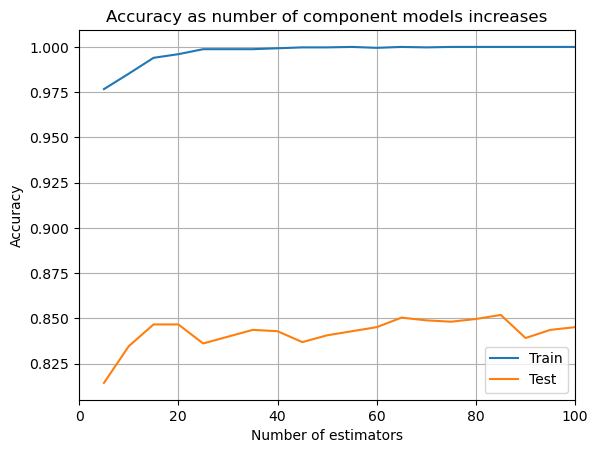

In [271]:
# Instantiate lists to save scores in
train_scores = []
test_scores = []
n_range = range(5, 101, 5)
for n in n_range:
    RF_model = RandomForestClassifier(n_estimators = n)
    RF_model.fit(X_train, y_train)
    train_scores.append(RF_model.score(X_train, y_train))
    test_scores.append(RF_model.score(X_test, y_test))
    
plt.plot(n_range, train_scores, label = 'Train')
plt.plot(n_range, test_scores, label = 'Test')
plt.xlabel("Number of estimators")
plt.ylabel("Accuracy")
plt.xlim(0, max(n_range)) 
plt.grid(True)
plt.title("Accuracy as number of component models increases")
plt.legend()

Best number of estimators were after 40. The graphic displays overfitting in our prediction. It is pressumible, it could be due to unbalance data. Let' evaluate this model with different metrics.

&nbsp; &nbsp; &nbsp; &nbsp; &nbsp;a.1 Accuracy Score for n_estimator = n

In [272]:
# Instantiate lists to save scores in each tree
decision_tree_train_scores = []
decision_tree_test_scores = []

# For each tree, score on train and test
for sub_tree in random_forest_model.estimators_:
    decision_tree_train_scores.append(sub_tree.score(X_train, y_train))
    decision_tree_test_scores.append(sub_tree.score(X_test, y_test))


In [273]:
# printing accuracy
print(f"Performance on TRAIN data:\n"
      f"Average of Component Trees: {np.mean(decision_tree_train_scores)}\n"
      f"Train Accuracy: {random_forest_model.score(X_train, y_train)}")
print("----------------")
print(f"Performance on TEST data:\n"
      f"Average of Component Trees: {np.mean(decision_tree_test_scores)}\n"
      f"Test Accuracy: {random_forest_model.score(X_test, y_test)}")

Performance on TRAIN data:
Average of Component Trees: 0.9148044132397191
Train Accuracy: 0.9994984954864594
----------------
Performance on TEST data:
Average of Component Trees: 0.7702857142857142
Test Accuracy: 0.8556390977443609


In [274]:
train_score_n = random_forest_model.score(X_train, y_train)
test_score_n = random_forest_model.score(X_test, y_test)

scores_df.loc[scores_df.shape[0],:]=['Random Forest','Unscaled',train_score_n,test_score_n, '-----', '-----', '-----', 'n', '-----']
scores_df

,model,scaler,train,test,runtime,C-values,K-values,n_estimators,max_depth
0,Logistic,MinMaxScaler,0.822467,0.824812,0.15,100,-----,-----,-----
1,Logistic,Standard,0.822969,0.823308,0.1,1,-----,-----,-----
2,Logistic,Robust,0.822969,0.822556,0.11,1,-----,-----,-----
3,-----,-----,-----,-----,-----,-----,-----,-----,-----
4,KNN,Unscaled,0.84654,0.780451,6.77,-----,k,-----,-----
5,KNN,MinMax,0.835005,0.833835,14.08,-----,42,-----,-----
6,KNN,Standard,0.838516,0.845113,14.65,-----,30,-----,-----
7,KNN,Robust,0.84328,0.846617,14.42,-----,27,-----,-----
8,-----,-----,-----,-----,-----,-----,-----,-----,-----
9,Random Forest,Unscaled,0.999498,0.855639,-----,-----,-----,n,-----


&nbsp; &nbsp; &nbsp; &nbsp; &nbsp;a.1 F1 for n_estimator = n

In [275]:
from sklearn.metrics import f1_score

# Instantiate lists to save scores in
train_f1_scores = []
test_f1_scores = []
n_range = range(5, 101, 5)

for n in n_range:
    RF_model = RandomForestClassifier(n_estimators=n, random_state=1)
    RF_model.fit(X_train, y_train)
    
    # Calculate F1 score for training set
    train_f1 = f1_score(y_train, RF_model.predict(X_train))
    train_f1_scores.append(train_f1)
    
    # Calculate F1 score for testing set
    test_f1 = f1_score(y_test, RF_model.predict(X_test))
    test_f1_scores.append(test_f1)
    



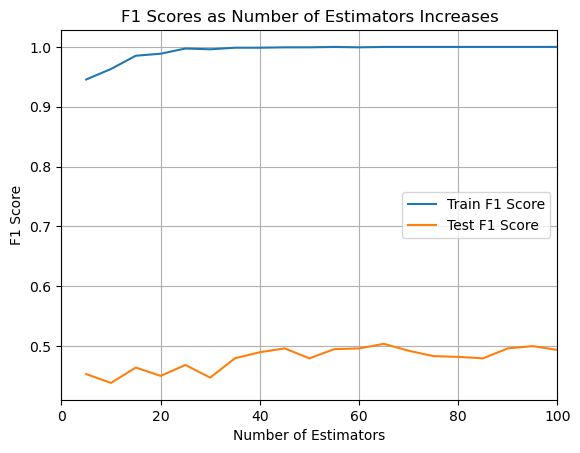

In [276]:
# Plotting F1 scores
plt.plot(n_range, train_f1_scores, label='Train F1 Score')
plt.plot(n_range, test_f1_scores, label='Test F1 Score')
plt.xlabel("Number of Estimators")
plt.ylabel("F1 Score")
plt.xlim(0, max(n_range))
plt.grid(True)
plt.title("F1 Scores as Number of Estimators Increases")
plt.legend()
plt.show()

In [277]:
# Load your data and split into train/test sets (assuming you have X_train, X_test, y_train, y_test)

# Instantiate and fit your model
RF_model = RandomForestClassifier(n_estimators=100)
RF_model.fit(X_train, y_train)

# Predict on training and test sets
y_train_pred = RF_model.predict(X_train)
y_test_pred = RF_model.predict(X_test)

# Calculate F1 score for training set
train_f1 = f1_score(y_train, y_train_pred)

# Calculate F1 score for test set
test_f1 = f1_score(y_test, y_test_pred)

print("Train F1 Score:", train_f1)
print("Test F1 Score:", test_f1)

Train F1 Score: 1.0
Test F1 Score: 0.48635235732009924


Random Forest model is currently overfitting. Different values onf n_estimators will be tried.




&nbsp; &nbsp; &nbsp; &nbsp; &nbsp;b. Adjusting hyperparameters for Random Forest

&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;&nbsp;b.1 Adjusting n_estimators, min_samples_split and max_depth

Based on the graphic with n_estimators = n, the values yielding the best accuracy were between 60 and 70. Evaluating all of them, the highest training and test accuracies were achieved with **n_estimators = 55** and **max_depth = 3**. Using a max_depth of 3 significantly reduced overfitting

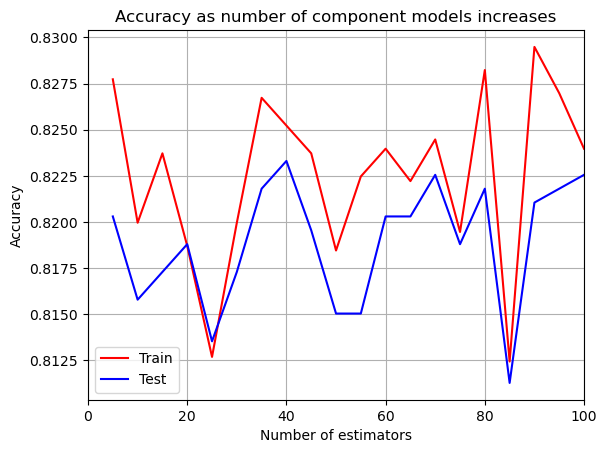

In [278]:
#### Fitting Random Forest with **n_estimators = 55** and **max_depth = 3**
train_scores_n55_d3 = []
test_scores_n55_d3 = []
n_range = range(5, 101, 5)
for n in n_range:
    RF_model = RandomForestClassifier(n_estimators = 55, max_depth = 3)
    RF_model.fit(X_train, y_train)
    train_scores_n55_d3.append(RF_model.score(X_train, y_train))
    test_scores_n55_d3.append(RF_model.score(X_test, y_test))

# print
plt.plot(n_range, train_scores_n55_d3, label='Train', color='red')  # Change color for train line
plt.plot(n_range, test_scores_n55_d3, label='Test', color='blue')  
plt.xlabel("Number of estimators")
plt.ylabel("Accuracy")
plt.grid(True)
plt.xlim(0, max(n_range))  # Adjust the x-axis limits
plt.title("Accuracy as number of component models increases")
plt.legend()

In [279]:
# printing accuracy
print(f"Performance on fitted data:\n"
      f"Average: {np.mean(train_scores_n55_d3)}\n"
      f"Train Accuracy with Random Forest: {random_forest_model.score(X_train, y_train)}")
print("----------------")
print(f"Performance on test data:\n"
      f"Average: {np.mean(test_scores_n55_d3)}\n"
      f"Test Accuracy with Random Forest: {random_forest_model.score(X_test, y_test)}")

Performance on fitted data:
Average: 0.8225300902708124
Train Accuracy with Random Forest: 0.9994984954864594
----------------
Performance on test data:
Average: 0.8189097744360903
Test Accuracy with Random Forest: 0.8556390977443609


Lower values in max_depth helpped to reduce overfitting when equal to 3. However, this lower value also reduces accuracy in both training and test data, and the model still displaying overfitting.

The hyperparameter min_samples_split will be added to improve this model.


In [280]:
train_scores_n55_d3 = random_forest_model.score(X_train, y_train)
test_scores_n55_d3 = random_forest_model.score(X_test, y_test)
scores_df.loc[scores_df.shape[0],:]=['Random Forest','Unscaled',train_scores_n55_d3,test_scores_n55_d3, '-----', '-----', '-----','55', '3',]
scores_df

,model,scaler,train,test,runtime,C-values,K-values,n_estimators,max_depth
0,Logistic,MinMaxScaler,0.822467,0.824812,0.15,100,-----,-----,-----
1,Logistic,Standard,0.822969,0.823308,0.1,1,-----,-----,-----
2,Logistic,Robust,0.822969,0.822556,0.11,1,-----,-----,-----
3,-----,-----,-----,-----,-----,-----,-----,-----,-----
4,KNN,Unscaled,0.84654,0.780451,6.77,-----,k,-----,-----
5,KNN,MinMax,0.835005,0.833835,14.08,-----,42,-----,-----
6,KNN,Standard,0.838516,0.845113,14.65,-----,30,-----,-----
7,KNN,Robust,0.84328,0.846617,14.42,-----,27,-----,-----
8,-----,-----,-----,-----,-----,-----,-----,-----,-----
9,Random Forest,Unscaled,0.999498,0.855639,-----,-----,-----,n,-----


- Adding hyperparameter **min_samples_split** to Random Forest with **n_estimators = 55** and **max_depth = 3**

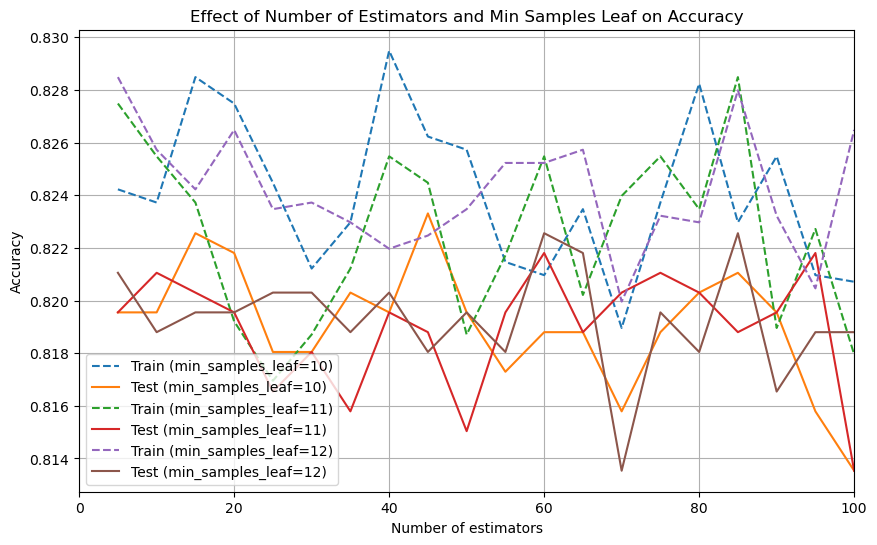

In [281]:
# Initialize lists to store training and test scores
train_scores_n55_d3_min = []
test_scores_n55_d3_min = []

# Define parameter ranges
n_range = range(5, 101, 5)
min_samples_leaf_values = [10,11,12]  # Define different values for min_samples_leaf

# Loop over different values of n_estimators and min_samples_leaf
for min_samples_leaf in min_samples_leaf_values:
    train_scores_min_samples = []
    test_scores_min_samples = []
    
    for n in n_range:
        # Initialize RandomForestClassifier with specified parameters
        RF_model = RandomForestClassifier(n_estimators=55, max_depth=3, min_samples_leaf=min_samples_leaf)
        
        # Fit model on training data
        RF_model.fit(X_train, y_train)
        
        # Compute training and test accuracy
        train_accuracy = RF_model.score(X_train, y_train)
        test_accuracy = RF_model.score(X_test, y_test)
        
        # Append scores to lists
        train_scores_min_samples.append(train_accuracy)
        test_scores_min_samples.append(test_accuracy)
    
    # Append the scores for this min_samples_leaf value to the main lists
    train_scores_n55_d3_min.append(train_scores_min_samples)
    test_scores_n55_d3_min.append(test_scores_min_samples)

# Plotting the results
plt.figure(figsize=(10, 6))

for i, min_samples_leaf in enumerate(min_samples_leaf_values):
    plt.plot(n_range, train_scores_n55_d3_min[i], label=f'Train (min_samples_leaf={min_samples_leaf})', linestyle='--')
    plt.plot(n_range, test_scores_n55_d3_min[i], label=f'Test (min_samples_leaf={min_samples_leaf})')

plt.xlabel("Number of estimators")
plt.ylabel("Accuracy")
plt.grid(True)
plt.xlim(0, max(n_range))
plt.title("Effect of Number of Estimators and Min Samples Leaf on Accuracy")
plt.legend()
plt.show()


min_sample_leave = 11 display the highest accuracy, however overfitting still noticeable.

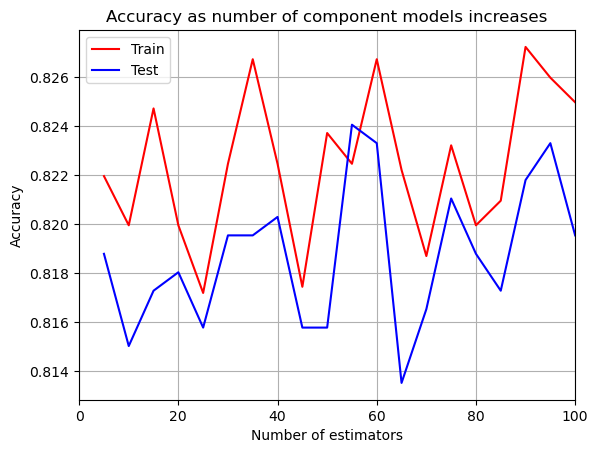

In [282]:
# Fitting Random Forest with **n_estimators = 5** and **max_depth = 1**
train_scores_n55_d3_min = []
test_scores_n55_d3_min = []
n_range = range(5, 101, 5)
for n in n_range:
    RF_model = RandomForestClassifier(n_estimators = 55, max_depth = 3, min_samples_leaf=11)
    RF_model.fit(X_train, y_train)
    train_scores_n55_d3_min.append(RF_model.score(X_train, y_train))
    test_scores_n55_d3_min.append(RF_model.score(X_test, y_test))
    

# print
plt.plot(n_range, train_scores_n55_d3_min, label='Train', color='red')  # Change color for train line
plt.plot(n_range, test_scores_n55_d3_min, label='Test', color='blue')  
plt.xlabel("Number of estimators")
plt.ylabel("Accuracy")
plt.grid(True)
plt.xlim(0, max(n_range))  # Adjust the x-axis limits
plt.title("Accuracy as number of component models increases")
plt.legend()

In [283]:
# printing accuracy
print(f"Performance on fitted data:\n"
      f"Average: {np.mean(train_scores_n55_d3_min)}\n"
      f"Train Accuracy with Random Forest: {random_forest_model.score(X_train, y_train)}")
print("----------------")
print(f"Performance on test data:\n"
      f"Average: {np.mean(test_scores_n55_d3_min)}\n"
      f"Test Accuracy with Random Forest: {random_forest_model.score(X_test, y_test)}")

Performance on fitted data:
Average: 0.8224548645937814
Train Accuracy with Random Forest: 0.9994984954864594
----------------
Performance on test data:
Average: 0.8187593984962407
Test Accuracy with Random Forest: 0.8556390977443609


&nbsp; &nbsp; &nbsp; &nbsp; &nbsp;b. Pipeline amd Cross Validation for **UNBALANCED** data using hyperparameters (samples_split, n_estimators and max_depth)

In [284]:
# Define the parameter grid to search over
param_grid = {
    'n_estimators': [55,100, 200, 300],
    'max_depth': [None,0,3, 5, 10, 20],
    'min_samples_split': [2, 3, 5, 10,11,15]
}

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=RF_model, param_grid=param_grid, scoring='f1', cv=5)

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and the best estimator
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

# Evaluate the best estimator on the training set
y_train_pred = best_estimator.predict(X_train)
train_f1_score = f1_score(y_train, y_train_pred)

# Evaluate the best estimator on the test set
y_pred = best_estimator.predict(X_test)
test_f1_score = f1_score(y_test, y_pred)

# Print the best parameters and F1 scores
print("Best Parameters:", best_params)
print("Train F1 Score:", train_f1_score)
print("Test F1 Score:", test_f1_score)

# Print F1 score per class on the test set
print("F1 Score per Class:")
print(classification_report(y_test, y_test_pred))


Best Parameters: {'max_depth': None, 'min_samples_split': 15, 'n_estimators': 200}
Train F1 Score: 0.5915492957746479
Test F1 Score: 0.4230769230769231
F1 Score per Class:
              precision    recall  f1-score   support

           0       0.87      0.95      0.91      1078
           1       0.65      0.39      0.49       252

    accuracy                           0.84      1330
   macro avg       0.76      0.67      0.70      1330
weighted avg       0.83      0.84      0.83      1330



Observations with Random Forest and unbalanced data using hyperparameters:
- The accuracy scores were 0.99 for training data and 0.85 for test data.
- The F1 score for Class 0 was 0.91, with recall of 0.96 and precision of 0.87. These results indicate that the model performed well in predicting Class 0, with low false positives and false negatives.
- In contrast, the F1 score for Class 1 was 0.49, with recall of 0.38 and precision of 0.69. These results suggest that the model did not perform well in predicting Class 1, showing moderate errors with false positive classifications and high false negatives.

The next step will be to try using balanced data.

- Balanced Data

&nbsp; &nbsp; &nbsp; &nbsp; &nbsp;a. Pipeline amd Cross Validation for **BALANCED** data using **UPSAMPLING** and hyperparameters (samples_split, n_estimators and max_depth)


In [285]:
# Define the parameter grid to search over
param_grid = {
    'n_estimators': [55,100, 200, 300],
    'max_depth': [None,0,3, 5, 10, 20],
    'min_samples_split': [2, 3, 5, 10,11,15]
}

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=RF_model, param_grid=param_grid, scoring='f1', cv=5)

# Fit the grid search to the training data
grid_search.fit(X_train_up, y_train_up)

# Get the best parameters and the best estimator
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

# Evaluate the best estimator on the training set
y_train_pred_up = best_estimator.predict(X_train_up)
train_f1_score = f1_score(y_train_up, y_train_pred_up)

# Evaluate the best estimator on the test set
y_test_pred = best_estimator.predict(X_test)
test_f1_score = f1_score(y_test, y_test_pred)

# Print the best parameters and F1 scores
print("Best Parameters:", best_params)
print("Train F1 Score:", train_f1_score)
print("Test F1 Score:", test_f1_score)

# Print F1 score per class on the test set
print("F1 Score per Class:")
print(classification_report(y_test, y_test_pred))

Best Parameters: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 200}
Train F1 Score: 0.9294642857142857
Test F1 Score: 0.5803432137285491
F1 Score per Class:
              precision    recall  f1-score   support

           0       0.93      0.81      0.87      1078
           1       0.48      0.74      0.58       252

    accuracy                           0.80      1330
   macro avg       0.70      0.77      0.72      1330
weighted avg       0.84      0.80      0.81      1330



Observations:
- Precision (0.64), recall (0.53), and F1(0.58) scores improved using upsampling at classifying Class 1 without negatively affecting Class 0 classification.
- Instead of these metrics having low scores with unbalanced data, using upsampling slightly improved the prediction for each class.
- Despite the improvement, downsampling will be tested to see if it performs better.




<br>
<br>
<br>

&nbsp; &nbsp; &nbsp; &nbsp; &nbsp;b. Pipeline amd Cross Validation for **BALANCED** data using **DOWNSAMPLING** and hyperparameters (samples_split, n_estimators and max_depth)

In [286]:
# Define the parameter grid to search over
param_grid = {
    'n_estimators': [55,100, 200, 300],
    'max_depth': [None,0,3, 5, 10, 20],
    'min_samples_split': [2, 3, 5, 10,11,15]
}

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=RF_model, param_grid=param_grid, scoring='f1', cv=5)

# Fit the grid search to the training data
grid_search.fit(X_train_down, y_train_down)

# Get the best parameters and the best estimator
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

# Evaluate the best estimator on the training set
y_train_pred_down = best_estimator.predict(X_train_down)
train_f1_score = f1_score(y_train_down, y_train_pred_down)

# Evaluate the best estimator on the test set
y_test_pred = best_estimator.predict(X_test)
test_f1_score = f1_score(y_test, y_test_pred)

# Print the best parameters and F1 scores
print("Best Parameters:", best_params)
print("Train F1 Score:", train_f1_score)
print("Test F1 Score:", test_f1_score)

# Print F1 score per class on the test set
print("F1 Score per Class:")
print(classification_report(y_test, y_test_pred))

Best Parameters: {'max_depth': 10, 'min_samples_split': 3, 'n_estimators': 200}
Train F1 Score: 0.8443305573350416
Test F1 Score: 0.5168539325842697
F1 Score per Class:
              precision    recall  f1-score   support

           0       0.94      0.68      0.79      1078
           1       0.38      0.82      0.52       252

    accuracy                           0.71      1330
   macro avg       0.66      0.75      0.65      1330
weighted avg       0.84      0.71      0.74      1330



Observations:
- For Class 1: Precision (0.38), recall (0.83), and F1(0.52) scores mean that false positive were high when classifying, and recall increased considereably reducing the chances to classify false neagtive in this category.
- For Class 0: Precision (0.95), recall (0.68), and F1(0.79) precision increased and recall and F1 decrease in comparison with using upsampling. Same with score which was 0.85 using upsampling, it went down to 0.71 accuracy.
- This scores are not completely satisfactory to select a model to predict wine quality classification, so that anothe model needs to be test.

<br>
<br>

&nbsp; &nbsp; &nbsp; &nbsp; &nbsp;c. Pipeline and Cross Validation for **BALANCED** data using **SMOTE** and hyperparameters (samples_split, n_estimators and max_depth)

In [287]:
# Define the parameter grid to search over
param_grid = {
    'n_estimators': [55,100, 200, 300],
    'max_depth': [None,0,3, 5, 10, 20],
    'min_samples_split': [2, 3, 5, 10,11,15]
}

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=RF_model, param_grid=param_grid, scoring='f1', cv=5)

# Fit the grid search to the training data
grid_search.fit(X_train_smote, y_train_smote)

# Get the best parameters and the best estimator
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

# Evaluate the best estimator on the training set
y_train_pred_smote = best_estimator.predict(X_train_smote)
train_f1_score = f1_score(y_train_smote, y_train_pred_smote)

# Evaluate the best estimator on the test set
y_test_pred = best_estimator.predict(X_test)
test_f1_score = f1_score(y_test, y_test_pred)

# Print the best parameters and F1 scores
print("Best Parameters:", best_params)
print("Train F1 Score:", train_f1_score)
print("Test F1 Score:", test_f1_score)

# Print F1 score per class on the test set
print("F1 Score per Class:")
print(classification_report(y_test, y_test_pred))

Observations:
- For Class 1: Precision (0.47), recall (0.74), and F1 score (0.58). These scores indicate that there were moderately high false positives when classifying this class, but recall improved considerably, reducing the chances of classifying false negatives in this category. The accuracy is 0.79.
- For Class 0: Precision (0.93), recall (0.81), and F1 score (0.86). Precision was exceptionally good, and recall and F1 were satisfactory.
- The Random Forest SMOTE model has been the best model evaluated so far.

<br>
<br>
<br>

#### 4. Adaptive Boosting (AdaBoost)<a class="anchor" id="part-3.4"></a>

Even though the accuracy scores indicated reasonably good predictions, the F1 scores varied significantly between the two classes. Consequently, this model will be implemented to improve classification performance.

This model was selected based on recommended literature due to its ability to combine multiple weak classifiers into a strong classifier. It is ideal for our classification tasks with a binary target and can address class imbalances by assigning higher weights to misclassified instances.


#### Importing packages

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

#### Fitting AdaBoost to UNBALANCED and UNSCALED data

In [ ]:
# fitting AdaBoost model with 2 estimators
abc_2 = AdaBoostClassifier(n_estimators=2)
abc_2.fit(X_train, y_train)

# evaluate
y_pred = abc_2.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.80      0.84      1078
           1       0.40      0.58      0.48       252

    accuracy                           0.76      1330
   macro avg       0.65      0.69      0.66      1330
weighted avg       0.80      0.76      0.77      1330



#### Fitting AdaBoost to BALANCED and UNSCALED data

- Upsampling

In [ ]:
# fitting AdaBoost model with 2 estimators
abc_2 = AdaBoostClassifier(n_estimators=2)
abc_2.fit(X_train_up, y_train_up)

# evaluate
y_pred = abc_2.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.69      0.79      1078
           1       0.37      0.77      0.50       252

    accuracy                           0.71      1330
   macro avg       0.65      0.73      0.65      1330
weighted avg       0.82      0.71      0.74      1330



- Downsampling

In [ ]:

# fitting AdaBoost model with 2 estimators
abc_2 = AdaBoostClassifier(n_estimators=2)
abc_2.fit(X_train_down, y_train_down)

# evaluate
y_pred = abc_2.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.56      0.71      1078
           1       0.32      0.87      0.47       252

    accuracy                           0.62      1330
   macro avg       0.63      0.72      0.59      1330
weighted avg       0.83      0.62      0.66      1330



- SMOTE

In [ ]:
# fitting AdaBoost model with 2 estimators
abc_2 = AdaBoostClassifier(n_estimators=2)
abc_2.fit(X_train_smote, y_train_smote)

# evaluate
y_pred = abc_2.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.65      0.77      1078
           1       0.35      0.81      0.49       252

    accuracy                           0.68      1330
   macro avg       0.64      0.73      0.63      1330
weighted avg       0.83      0.68      0.72      1330



#### Pipeline for AdaBoost with BALANCED and SCALED data

- Upsampling

In [ ]:
# Define the pipeline steps
scalers = [('MinMax', MinMaxScaler()), ('Standard', StandardScaler()), ('Robust', RobustScaler())]
classifiers = [('AdaBoost', AdaBoostClassifier())]

# Create a list of pipelines (each combining a scaler with the classifier)
pipelines = []
for scaler_name, scaler in scalers:
    for classifier_name, classifier in classifiers:
        pipeline_name = f'{scaler_name}_{classifier_name}'
        pipeline = Pipeline([
            (scaler_name, scaler),
            (classifier_name, classifier)
        ])
        
        pipelines.append((pipeline_name, pipeline))

# Fit each pipeline and evaluate
for pipeline_name, pipeline in pipelines:
    print(f"Pipeline: {pipeline_name}")
    pipeline.fit(X_train_up, y_train_up)
    y_pred = pipeline.predict(X_test)
    print(classification_report(y_test, y_pred))
    print("="*50)


Pipeline: MinMax_AdaBoost
              precision    recall  f1-score   support

           0       0.93      0.72      0.81      1078
           1       0.39      0.75      0.51       252

    accuracy                           0.73      1330
   macro avg       0.66      0.74      0.66      1330
weighted avg       0.82      0.73      0.76      1330

Pipeline: Standard_AdaBoost
              precision    recall  f1-score   support

           0       0.93      0.72      0.81      1078
           1       0.39      0.75      0.51       252

    accuracy                           0.73      1330
   macro avg       0.66      0.74      0.66      1330
weighted avg       0.82      0.73      0.76      1330

Pipeline: Robust_AdaBoost
              precision    recall  f1-score   support

           0       0.93      0.72      0.81      1078
           1       0.39      0.75      0.51       252

    accuracy                           0.73      1330
   macro avg       0.66      0.74      0.66     

Observations:
- Using different scalers did not affect the performance of this model.
- Recall showed good scores for classifying both classes.
- However, the maximum F1 score for Class 1 remains at 0.51.
- Precision for Class 1 was very low, indicating a tendency to classify instances as Class 1 when they are not (resulting in False Positives).

<br>
<br>
<br>

- Downsampling 

In [ ]:
# Define the pipeline steps
scalers = [('MinMax', MinMaxScaler()), ('Standard', StandardScaler()), ('Robust', RobustScaler())]
classifiers = [('AdaBoost', AdaBoostClassifier())]

# Create a list of pipelines (each combining a scaler with the classifier)
pipelines = []
for scaler_name, scaler in scalers:
    for classifier_name, classifier in classifiers:
        pipeline_name = f'{scaler_name}_{classifier_name}'
        pipeline = Pipeline([
            (scaler_name, scaler),
            (classifier_name, classifier)
        ])
        pipelines.append((pipeline_name, pipeline))

# Fit each pipeline and evaluate
for pipeline_name, pipeline in pipelines:
    print(f"Pipeline: {pipeline_name}")
    pipeline.fit(X_train_down, y_train_down)
    y_pred = pipeline.predict(X_test)
    print(classification_report(y_test, y_pred))
    print("="*50)

Pipeline: MinMax_AdaBoost
              precision    recall  f1-score   support

           0       0.93      0.68      0.79      1078
           1       0.37      0.79      0.50       252

    accuracy                           0.70      1330
   macro avg       0.65      0.74      0.64      1330
weighted avg       0.83      0.70      0.73      1330

Pipeline: Standard_AdaBoost
              precision    recall  f1-score   support

           0       0.93      0.68      0.79      1078
           1       0.37      0.79      0.50       252

    accuracy                           0.70      1330
   macro avg       0.65      0.74      0.64      1330
weighted avg       0.83      0.70      0.73      1330

Pipeline: Robust_AdaBoost
              precision    recall  f1-score   support

           0       0.93      0.68      0.79      1078
           1       0.37      0.79      0.50       252

    accuracy                           0.70      1330
   macro avg       0.65      0.74      0.64     

Observations:
- For Class 1: Precision (0.38), recall (0.83), and F1(0.52) scores mean that false positive were high when classifying, and recall increased considereably reducing the chances to classify false neagtive in this category.
- For Class 0: Precision (0.95), recall (0.68), and F1(0.79) precision increased and recall and F1 decrease in comparison with using upsampling. Same with score which was 0.85 using upsampling, it went down to 0.71 accuracy.
- This scores are not completely satisfactory to select a model to predict wine quality classification, so that anothe model needs to be test.


<br>
<br>
<br>

- SMOTE

In [ ]:
# Define the pipeline steps
scalers = [('MinMax + SMOTE', MinMaxScaler()), ('Standard + SMOTE', StandardScaler()), ('Robust + SMOTE', RobustScaler())]
classifiers = [('AdaBoost', AdaBoostClassifier())]

# Create a list of pipelines (each combining a scaler with the classifier)
pipelines = []
for scaler_name, scaler in scalers:
    for classifier_name, classifier in classifiers:
        pipeline_name = f'{scaler_name}_{classifier_name}'
        pipeline = Pipeline([
            (scaler_name, scaler),
            (classifier_name, classifier)
        ])
        pipelines.append((pipeline_name, pipeline))

# Fit each pipeline and evaluate
for pipeline_name, pipeline in pipelines:
    print(f"Pipeline: {pipeline_name}")
    pipeline.fit(X_train_smote, y_train_smote)
    y_pred = pipeline.predict(X_test)
    print(classification_report(y_test, y_pred))

Pipeline: MinMax + SMOTE_AdaBoost
              precision    recall  f1-score   support

           0       0.92      0.75      0.83      1078
           1       0.41      0.73      0.52       252

    accuracy                           0.75      1330
   macro avg       0.66      0.74      0.67      1330
weighted avg       0.82      0.75      0.77      1330

Pipeline: Standard + SMOTE_AdaBoost
              precision    recall  f1-score   support

           0       0.92      0.75      0.83      1078
           1       0.41      0.73      0.52       252

    accuracy                           0.75      1330
   macro avg       0.66      0.74      0.67      1330
weighted avg       0.82      0.75      0.77      1330

Pipeline: Robust + SMOTE_AdaBoost
              precision    recall  f1-score   support

           0       0.92      0.75      0.83      1078
           1       0.41      0.73      0.52       252

    accuracy                           0.75      1330
   macro avg       0.66 

Observations:
- Using different scalers with AdaBoost did not impact the scores differently. However, scaling the data improved the model's performance.
- **Class 0:** Precision (0.92), recall (0.75), and F1 score (0.75). Precision was exceptionally good, and recall and F1 were satisfactory.
- **Class 1:** Precision (0.41), recall (0.73), and F1 score (0.52). These scores indicate a moderate number of false positives when classifying this class, but recall improved considerably, reducing the chances of classifying false negatives in this category. The accuracy is 0.75.

These results confirm the previous conclusion that the Random Forest model implemented on balanced data with SMOTE performed the best in predicting classes. However, accurately predicting Class 1 remained the most challenging aspect for all the models, even for Random Forest with SMOTE.

#### Best estimators and learning rate

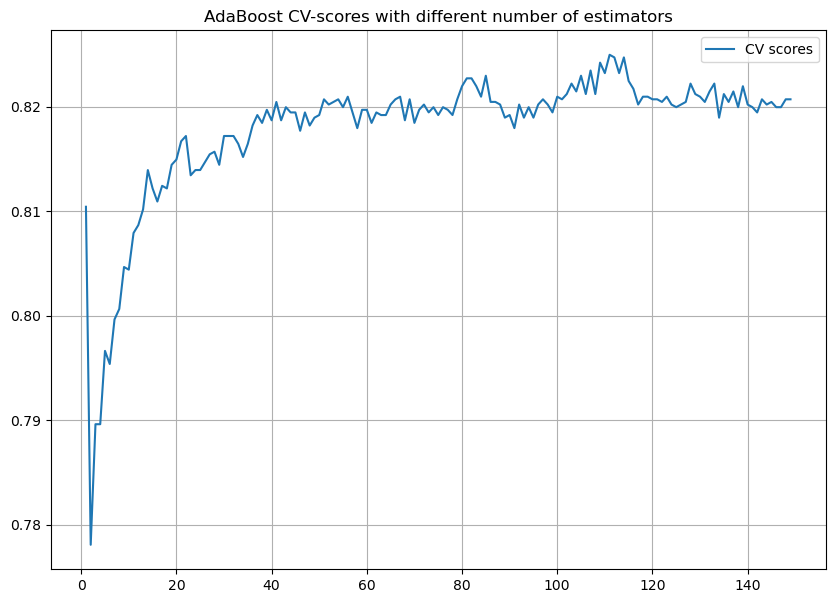

In [ ]:
from sklearn.model_selection import cross_val_score
cv_scores = []
n_est_range = list(range(1, 150))

for n_est in n_est_range:
    ada = AdaBoostClassifier(n_estimators=n_est)
    cv_scores.append(np.mean(cross_val_score(ada, X_train, y_train, cv=5)))
    
    print(n_est, end="\r")

# Visualization
plt.figure(figsize=(10, 7))
plt.plot(n_est_range, cv_scores, label="CV scores")
plt.legend()
plt.title("AdaBoost CV-scores with different number of estimators")
plt.grid(True)
plt.show()

Using few estimators gives low performance. The optimal number of estimators seems to be between 100 and 120 where accuracy peaks around 82%.

Let's verify what combination of learning rate and number of estimator give the highest accuracy

In [ ]:
n_est_range = list(range(1, 130, 5))
learning_rate_range = [0.5, 1, 1.5]

results = []

for learning_rate in learning_rate_range:
    print(learning_rate, end=" ")
    for n_est in n_est_range:
        ada = AdaBoostClassifier(n_estimators=n_est, learning_rate=learning_rate)
        cv_score = np.mean(cross_val_score(ada, X_train_up, y_train_up, cv=5))
        
        results.append(
            {
                "learning_rate": learning_rate, 
                "n_estimators": n_est,
                "cv_score": cv_score
            })
    
        print(n_est, end="\r")

results = pd.DataFrame(results)

In [ ]:
results.head()

,learning_rate,n_estimators,cv_score
0,0.5,1,0.724940
1,0.5,6,0.735615
2,0.5,11,0.744586
3,0.5,16,0.755725
4,0.5,21,0.755726


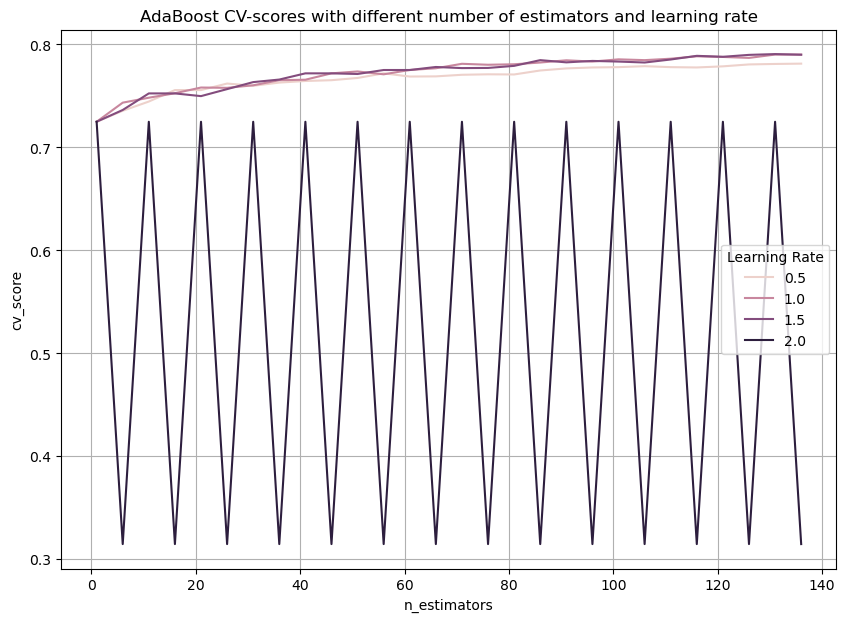

In [ ]:
plt.figure(figsize=(10, 7))
sns.lineplot(data=results, x="n_estimators", y="cv_score", hue="learning_rate")
plt.legend(title="Learning Rate")
plt.title("AdaBoost CV-scores with different number of estimators and learning rate")
plt.grid(True)
plt.show()

The best combination was learning rate = 1.5 and n_estimators high number of estimators. 

#### Learning Curve

Pipeline: MinMax_AdaBoost


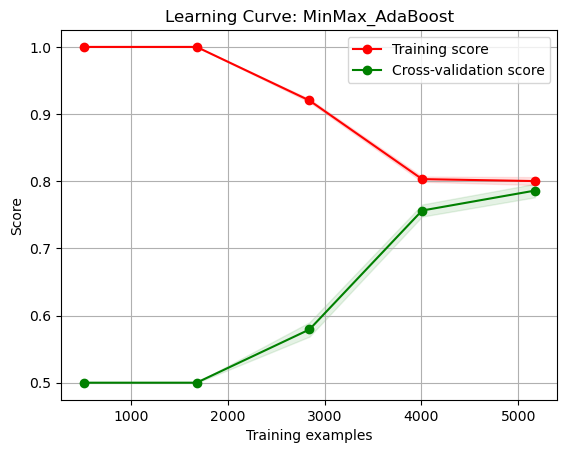

Pipeline: Standard_AdaBoost


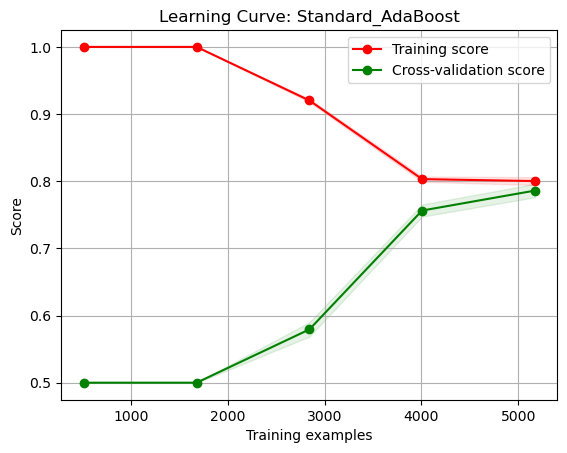

Pipeline: Robust_AdaBoost


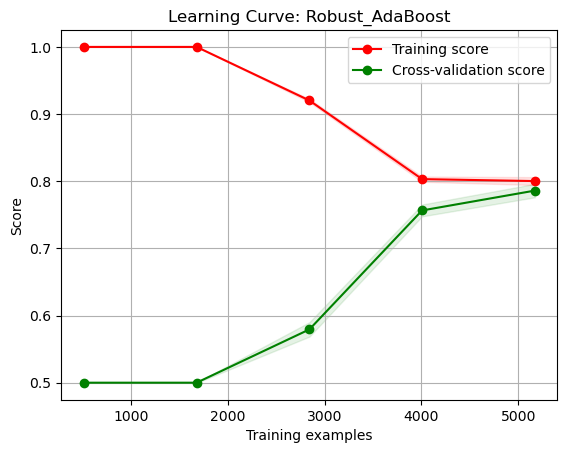

In [ ]:
from sklearn.model_selection import learning_curve

# Define the AdaBoost classifier
ada_clf = AdaBoostClassifier(n_estimators=100)

# Define the pipeline steps with different scalers
scalers = [('MinMax', MinMaxScaler()), ('Standard', StandardScaler()), ('Robust', RobustScaler())]

# Create a list of pipelines (each combining a scaler with AdaBoost classifier)
pipelines = []
for scaler_name, scaler in scalers:
    pipeline_name = f'{scaler_name}_AdaBoost'
    pipeline = Pipeline([
        (scaler_name, scaler),
        ('AdaBoost', ada_clf)
    ])
    pipelines.append((pipeline_name, pipeline))

# Define a function to plot learning curve
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores, fit_times, _ = \
        learning_curve(estimator, X, y, cv=cv, n_jobs=-1,
                       train_sizes=train_sizes,
                       return_times=True)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

# Fit each pipeline, evaluate, and plot learning curve
for pipeline_name, pipeline in pipelines:
    print(f"Pipeline: {pipeline_name}")
    title = f"Learning Curve: {pipeline_name}"
    plot_learning_curve(pipeline, title, X_train_up, y_train_up, cv=5)
    plt.show()


Observations:
- The model stabilize after 4000 training samples, inidicating more than 4000 training data for this model perfoms properly.
- There is sign of overfitting because the cross validation value is lower that the train score.
- However, there is not a huge gap between score after scores estabilized indicating a good model generalization.

### Part 4 - Conslusion<a class="anchor" id="part-4"></a>

___

The original data exhibits imbalance in its class distribution, leading to inaccurate precision in classifying each category (resulting in false positives). To address this, the was balanced using both upsampling downsampling, and SMOTE techniques. SMOTE had the best score with any model evaluated. 

The model that achieved the best accuracy score, recall, precision, and F1 Random Forest model implemented on balanced data with SMOTE performed the best in predicting classes. However, accurately predicting Class 1 remained the most challenging aspect for all the models, including Random Forest with SMOTE.

